## Step 1: Loading the Data


In [1]:
# Dependencies...
# Import necessary libraries

import pandas as pd
import numpy as np
import random as rd
import math
import os

In [2]:
from matplotlib import style
import matplotlib.pyplot as plt

from scipy.stats import shapiro
from scipy.stats import lognorm

In [3]:
# Load the CSV and Excel files
candidates_df = pd.read_csv("wombi_candidates 1.csv")
employees_df = pd.read_excel("wombi_employees2.xlsx")
print("[INFO] Data loaded successfully.")

[INFO] Data loaded successfully.


In [4]:
print("[INFO] Count of Cadndiate Data", candidates_df.count())

[INFO] Count of Cadndiate Data wombus_id                          449
birth_continent                    423
gender                             448
age                                442
college_degree                     399
problem_solving_skill              433
technology_skill                   421
english_skill                      368
most_recent_income                 438
total_jobs                         313
shirt_color_preference             445
customer_exp_preference            396
work_env_preference                445
personal_growth_preference         429
honest_communication_preference    433
community_service_preference       446
remote_work_preference             417
industry_preference                444
dtype: int64


In [5]:
# Display the first few rows of both datasets to check their structure
print("Candidates Data:")
candidates_df.head(5)

Candidates Data:


,wombus_id,birth_continent,gender,age,college_degree,problem_solving_skill,technology_skill,english_skill,most_recent_income,total_jobs,shirt_color_preference,customer_exp_preference,work_env_preference,personal_growth_preference,honest_communication_preference,community_service_preference,remote_work_preference,industry_preference
0,1105,NaN,Female,NaN,0.0,8.400397,23.348271,9.105426,"77,367",5.0,Purple,Strongly Disagree,Strongly Agree,Agree,Neutral,Strongly Agree,Hybrid,Higher Education
1,1106,North America,Female,52.0,1.0,7.787927,24.799825,9.095713,"78,979",4.0,Blue,Neutral,Strongly Disagree,Disagree,Strongly Agree,Strongly Agree,Hybrid,Finance
2,1107,North America,Male,32.0,0.0,23.005739,25.484927,8.967305,"38,932",NaN,Blue,Strongly Disagree,Disagree,Agree,Agree,Neutral,On-Site,Finance
3,1108,Africa,Male,49.0,0.0,15.565866,NaN,5.914387,"58,511",NaN,Purple,Disagree,Strongly Agree,Agree,Neutral,Strongly Agree,NaN,Tech
4,1109,North America,Male,47.0,0.0,12.784366,30.619283,8.751296,"65,831",NaN,Purple,Strongly Disagree,Disagree,Neutral,Strongly Agree,Strongly Agree,On-Site,Renewable Energy


In [6]:
print("[INFO] Count of Employee Data", employees_df.count())

[INFO] Count of Employee Data wombus_id                          233936
birth_continent                    222243
gender                             231593
age                                231599
college_degree                     205860
problem_solving_skill              224577
technology_skill                   212869
english_skill                      194172
most_recent_income                 226915
total_jobs                         156725
shirt_color_preference             231596
customer_exp_preference            205863
work_env_preference                231596
personal_growth_preference         226924
honest_communication_preference    226920
community_service_preference       229251
remote_work_preference             215217
industry_preference                231597
score                              233936
dtype: int64


In [7]:
print("Employees Data:")
employees_df.head(5)

Employees Data:


,wombus_id,birth_continent,gender,age,college_degree,problem_solving_skill,technology_skill,english_skill,most_recent_income,total_jobs,shirt_color_preference,customer_exp_preference,work_env_preference,personal_growth_preference,honest_communication_preference,community_service_preference,remote_work_preference,industry_preference,score
0,1554,North America,Male,51.0,NaN,NaN,31.522899,8.274305,65213.0,NaN,Purple,Strongly Disagree,Disagree,Agree,Strongly Agree,Strongly Agree,Hybrid,Renewable Energy,61.06
1,1555,North America,Female,48.0,0.0,17.016506,24.785969,9.426865,54693.0,NaN,Blue,Strongly Disagree,Strongly Agree,Strongly Agree,Disagree,Strongly Agree,Hybrid,Finance,53.20
2,1556,NaN,Female,47.0,0.0,NaN,27.225131,5.772313,47381.0,4.0,Purple,Agree,Agree,Agree,Neutral,Strongly Agree,On-Site,Finance,70.18
3,1557,North America,Male,35.0,0.0,20.723280,25.528884,8.825814,44939.0,NaN,Blue,Agree,NaN,Agree,Neutral,Strongly Agree,Hybrid,Tech,58.37
4,1558,Asia,Female,45.0,0.0,15.862225,31.854325,4.140779,57731.0,NaN,Blue,Agree,Strongly Agree,Agree,Neutral,Strongly Agree,Hybrid,Finance,61.77


In [8]:
import numpy as np
import math
from scipy.stats import lognorm, shapiro


# Function to evaluate the normality of a given dataset using Shapiro-Wilk test
def evaluate_distribution(data, seed=100, dist_size=1000, log_scale=1, log_s=0.5):

    print(f"INFO: Setting random seed to {seed} for reproducibility.")
    np.random.seed(seed)  # Set random seed for reproducibility

    print(
        f"INFO: Generating a log-normal distributed dataset with size {dist_size}, log_scale {log_scale}, and log_s {log_s}."
    )
    lognorm_set = lognorm.rvs(s=log_s, scale=math.exp(log_scale), size=dist_size)

    print(
        "INFO: Performing Shapiro-Wilk test for normality on the generated log-normal data."
    )
    stat, p_value = shapiro(lognorm_set)

    # Display results
    print(f"INFO: Shapiro-Wilk Test Completed.")
    print(f"Test Statistic: {stat}")
    print(f"P-Value: {p_value}")

    if p_value > 0.05:
        print("INFO: The data appears to be normally distributed (fail to reject H0).")
    else:
        print("INFO: The data does not appear to be normally distributed (reject H0).")

    return stat, p_value

In [9]:
evaluate_distribution(employees_df)

INFO: Setting random seed to 100 for reproducibility.
INFO: Generating a log-normal distributed dataset with size 1000, log_scale 1, and log_s 0.5.
INFO: Performing Shapiro-Wilk test for normality on the generated log-normal data.
INFO: Shapiro-Wilk Test Completed.
Test Statistic: 0.8157704472541809
P-Value: 2.595954377516247e-32
INFO: The data does not appear to be normally distributed (reject H0).


(0.8157704472541809, 2.595954377516247e-32)

In [10]:
evaluate_distribution(candidates_df)

INFO: Setting random seed to 100 for reproducibility.
INFO: Generating a log-normal distributed dataset with size 1000, log_scale 1, and log_s 0.5.
INFO: Performing Shapiro-Wilk test for normality on the generated log-normal data.
INFO: Shapiro-Wilk Test Completed.
Test Statistic: 0.8157704472541809
P-Value: 2.595954377516247e-32
INFO: The data does not appear to be normally distributed (reject H0).


(0.8157704472541809, 2.595954377516247e-32)

## Step 2: Initial Data Inspection

Check the structure of both datasets, including data types, missing values, and summary statistics.


In [11]:
# Get basic info on both datasets
print("Candidates Data Info:")
print(candidates_df.info(), "\n")

print("Employees Data Info:")
print(employees_df.info())

# Checking for missing values in both datasets
print("\nMissing Values in Candidates Data:")
print(candidates_df.isnull().sum(), "\n")

print("Missing Values in Employees Data:")
print(employees_df.isnull().sum())

Candidates Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449 entries, 0 to 448
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   wombus_id                        449 non-null    int64  
 1   birth_continent                  423 non-null    object 
 2   gender                           448 non-null    object 
 3   age                              442 non-null    float64
 4   college_degree                   399 non-null    float64
 5   problem_solving_skill            433 non-null    float64
 6   technology_skill                 421 non-null    float64
 7   english_skill                    368 non-null    float64
 8   most_recent_income               438 non-null    object 
 9   total_jobs                       313 non-null    float64
 10  shirt_color_preference           445 non-null    object 
 11  customer_exp_preference          396 non-null    object 
 12  

In [12]:
print("INFO: Starting the evaluation of distribution.")
stat, p_value = evaluate_distribution(
    candidates_df
)  # You can pass a dataset to this function
print("INFO: Evaluation completed.")

INFO: Starting the evaluation of distribution.
INFO: Setting random seed to 100 for reproducibility.
INFO: Generating a log-normal distributed dataset with size 1000, log_scale 1, and log_s 0.5.
INFO: Performing Shapiro-Wilk test for normality on the generated log-normal data.
INFO: Shapiro-Wilk Test Completed.
Test Statistic: 0.8157704472541809
P-Value: 2.595954377516247e-32
INFO: The data does not appear to be normally distributed (reject H0).
INFO: Evaluation completed.


In [13]:
print("INFO: Starting the evaluation of distribution.")
stat, p_value = evaluate_distribution(
    employees_df
)  # You can pass a dataset to this function
print("INFO: Evaluation completed.")

INFO: Starting the evaluation of distribution.
INFO: Setting random seed to 100 for reproducibility.
INFO: Generating a log-normal distributed dataset with size 1000, log_scale 1, and log_s 0.5.
INFO: Performing Shapiro-Wilk test for normality on the generated log-normal data.
INFO: Shapiro-Wilk Test Completed.
Test Statistic: 0.8157704472541809
P-Value: 2.595954377516247e-32
INFO: The data does not appear to be normally distributed (reject H0).
INFO: Evaluation completed.


## Step 3: Descriptive Statistics


In [14]:
# Descriptive statistics for numerical columns in both datasets
print("\nCandidates Data - Descriptive Statistics:")
candidates_df.describe()


Candidates Data - Descriptive Statistics:


,wombus_id,age,college_degree,problem_solving_skill,technology_skill,english_skill,total_jobs
count,449.000000,442.000000,399.000000,433.000000,421.000000,368.000000,313.000000
mean,1329.000000,44.843891,0.210526,14.726201,25.027173,7.758287,3.920128
std,129.759393,10.197620,0.408194,3.980498,5.178427,1.546596,1.264662
min,1105.000000,18.000000,0.000000,4.112905,1.000000,3.638857,1.000000
25%,1217.000000,38.000000,0.000000,11.945211,22.737350,6.397113,3.000000
50%,1329.000000,44.000000,0.000000,14.517158,26.034703,8.142138,4.000000
75%,1441.000000,51.000000,0.000000,17.092938,28.663559,9.181275,5.000000
max,1553.000000,72.000000,1.000000,26.553890,34.268587,10.082081,9.000000


In [15]:
# Descriptive statistics for numerical columns in both datasets
print("\nCandidates Data - Descriptive Statistics:")
candidates_df.describe().T


Candidates Data - Descriptive Statistics:


,count,mean,std,min,25%,50%,75%,max
wombus_id,449.0,1329.000000,129.759393,1105.000000,1217.000000,1329.000000,1441.000000,1553.000000
age,442.0,44.843891,10.197620,18.000000,38.000000,44.000000,51.000000,72.000000
college_degree,399.0,0.210526,0.408194,0.000000,0.000000,0.000000,0.000000,1.000000
problem_solving_skill,433.0,14.726201,3.980498,4.112905,11.945211,14.517158,17.092938,26.553890
technology_skill,421.0,25.027173,5.178427,1.000000,22.737350,26.034703,28.663559,34.268587
english_skill,368.0,7.758287,1.546596,3.638857,6.397113,8.142138,9.181275,10.082081
total_jobs,313.0,3.920128,1.264662,1.000000,3.000000,4.000000,5.000000,9.000000


In [16]:
print("Employees Data - Descriptive Statistics:")
employees_df.describe()

Employees Data - Descriptive Statistics:


,wombus_id,age,college_degree,problem_solving_skill,technology_skill,english_skill,most_recent_income,total_jobs,score
count,233936.000000,231599.000000,205860.000000,224577.000000,212869.000000,194172.000000,226915.000000,156725.000000,233936.000000
mean,118521.500000,44.991822,0.208802,14.994757,25.420540,7.647663,60010.868506,3.897904,58.205192
std,67531.650624,9.976091,0.406454,3.797183,5.074806,1.558431,9995.172460,1.300534,8.142174
min,1554.000000,15.000000,0.000000,1.000000,1.000000,1.311934,14884.000000,0.000000,1.000000
25%,60037.750000,38.000000,0.000000,12.441202,23.045138,6.357023,53269.000000,3.000000,52.760000
50%,118521.500000,45.000000,0.000000,14.993988,26.380477,7.931914,60010.000000,4.000000,58.150000
75%,177005.250000,52.000000,0.000000,17.555919,28.857932,9.090198,66731.000000,5.000000,63.620000
max,235489.000000,92.000000,1.000000,30.000000,40.000000,10.250000,102892.000000,10.000000,100.000000


In [17]:
print("Employees Data - Descriptive Statistics:")
employees_df.describe().T

Employees Data - Descriptive Statistics:


,count,mean,std,min,25%,50%,75%,max
wombus_id,233936.0,118521.500000,67531.650624,1554.000000,60037.750000,118521.500000,177005.250000,235489.00
age,231599.0,44.991822,9.976091,15.000000,38.000000,45.000000,52.000000,92.00
college_degree,205860.0,0.208802,0.406454,0.000000,0.000000,0.000000,0.000000,1.00
problem_solving_skill,224577.0,14.994757,3.797183,1.000000,12.441202,14.993988,17.555919,30.00
technology_skill,212869.0,25.420540,5.074806,1.000000,23.045138,26.380477,28.857932,40.00
english_skill,194172.0,7.647663,1.558431,1.311934,6.357023,7.931914,9.090198,10.25
most_recent_income,226915.0,60010.868506,9995.172460,14884.000000,53269.000000,60010.000000,66731.000000,102892.00
total_jobs,156725.0,3.897904,1.300534,0.000000,3.000000,4.000000,5.000000,10.00
score,233936.0,58.205192,8.142174,1.000000,52.760000,58.150000,63.620000,100.00


## Step 4: Exploratory Data Analysis (EDA)


### 4.1 Checking for Duplicates

Ensure there are no duplicate rows in either dataset.


In [18]:
# Checking for duplicate rows in the datasets
print("\nDuplicate rows in Candidates Data:", candidates_df.duplicated().sum())
print("Duplicate rows in Employees Data:", employees_df.duplicated().sum())


Duplicate rows in Candidates Data: 0
Duplicate rows in Employees Data: 0


In [19]:
## Check information about the dataset

employees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233936 entries, 0 to 233935
Data columns (total 19 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   wombus_id                        233936 non-null  int64  
 1   birth_continent                  222243 non-null  object 
 2   gender                           231593 non-null  object 
 3   age                              231599 non-null  float64
 4   college_degree                   205860 non-null  float64
 5   problem_solving_skill            224577 non-null  float64
 6   technology_skill                 212869 non-null  float64
 7   english_skill                    194172 non-null  float64
 8   most_recent_income               226915 non-null  float64
 9   total_jobs                       156725 non-null  float64
 10  shirt_color_preference           231596 non-null  object 
 11  customer_exp_preference          205863 non-null  object 
 12  wo

In [20]:
## Check the number of null values for each variable in the dataset

for col in employees_df.columns:
    print('Null Values for column {} is {}%'.format(col, np.round(employees_df[col].isnull().sum()*100 / len(employees_df[col])),2))

Null Values for column wombus_id is 0.0%
Null Values for column birth_continent is 5.0%
Null Values for column gender is 1.0%
Null Values for column age is 1.0%
Null Values for column college_degree is 12.0%
Null Values for column problem_solving_skill is 4.0%
Null Values for column technology_skill is 9.0%
Null Values for column english_skill is 17.0%
Null Values for column most_recent_income is 3.0%
Null Values for column total_jobs is 33.0%
Null Values for column shirt_color_preference is 1.0%
Null Values for column customer_exp_preference is 12.0%
Null Values for column work_env_preference is 1.0%
Null Values for column personal_growth_preference is 3.0%
Null Values for column honest_communication_preference is 3.0%
Null Values for column community_service_preference is 2.0%
Null Values for column remote_work_preference is 8.0%
Null Values for column industry_preference is 1.0%
Null Values for column score is 0.0%


In [21]:
print("Shape of the dataset:", employees_df.shape)

Shape of the dataset: (233936, 19)


In [22]:
print("Shape of the dataset:", candidates_df.shape)

Shape of the dataset: (449, 18)


In [23]:
candidates_df.head()

,wombus_id,birth_continent,gender,age,college_degree,problem_solving_skill,technology_skill,english_skill,most_recent_income,total_jobs,shirt_color_preference,customer_exp_preference,work_env_preference,personal_growth_preference,honest_communication_preference,community_service_preference,remote_work_preference,industry_preference
0,1105,NaN,Female,NaN,0.0,8.400397,23.348271,9.105426,"77,367",5.0,Purple,Strongly Disagree,Strongly Agree,Agree,Neutral,Strongly Agree,Hybrid,Higher Education
1,1106,North America,Female,52.0,1.0,7.787927,24.799825,9.095713,"78,979",4.0,Blue,Neutral,Strongly Disagree,Disagree,Strongly Agree,Strongly Agree,Hybrid,Finance
2,1107,North America,Male,32.0,0.0,23.005739,25.484927,8.967305,"38,932",NaN,Blue,Strongly Disagree,Disagree,Agree,Agree,Neutral,On-Site,Finance
3,1108,Africa,Male,49.0,0.0,15.565866,NaN,5.914387,"58,511",NaN,Purple,Disagree,Strongly Agree,Agree,Neutral,Strongly Agree,NaN,Tech
4,1109,North America,Male,47.0,0.0,12.784366,30.619283,8.751296,"65,831",NaN,Purple,Strongly Disagree,Disagree,Neutral,Strongly Agree,Strongly Agree,On-Site,Renewable Energy


In [24]:
employees_df.head()

,wombus_id,birth_continent,gender,age,college_degree,problem_solving_skill,technology_skill,english_skill,most_recent_income,total_jobs,shirt_color_preference,customer_exp_preference,work_env_preference,personal_growth_preference,honest_communication_preference,community_service_preference,remote_work_preference,industry_preference,score
0,1554,North America,Male,51.0,NaN,NaN,31.522899,8.274305,65213.0,NaN,Purple,Strongly Disagree,Disagree,Agree,Strongly Agree,Strongly Agree,Hybrid,Renewable Energy,61.06
1,1555,North America,Female,48.0,0.0,17.016506,24.785969,9.426865,54693.0,NaN,Blue,Strongly Disagree,Strongly Agree,Strongly Agree,Disagree,Strongly Agree,Hybrid,Finance,53.20
2,1556,NaN,Female,47.0,0.0,NaN,27.225131,5.772313,47381.0,4.0,Purple,Agree,Agree,Agree,Neutral,Strongly Agree,On-Site,Finance,70.18
3,1557,North America,Male,35.0,0.0,20.723280,25.528884,8.825814,44939.0,NaN,Blue,Agree,NaN,Agree,Neutral,Strongly Agree,Hybrid,Tech,58.37
4,1558,Asia,Female,45.0,0.0,15.862225,31.854325,4.140779,57731.0,NaN,Blue,Agree,Strongly Agree,Agree,Neutral,Strongly Agree,Hybrid,Finance,61.77


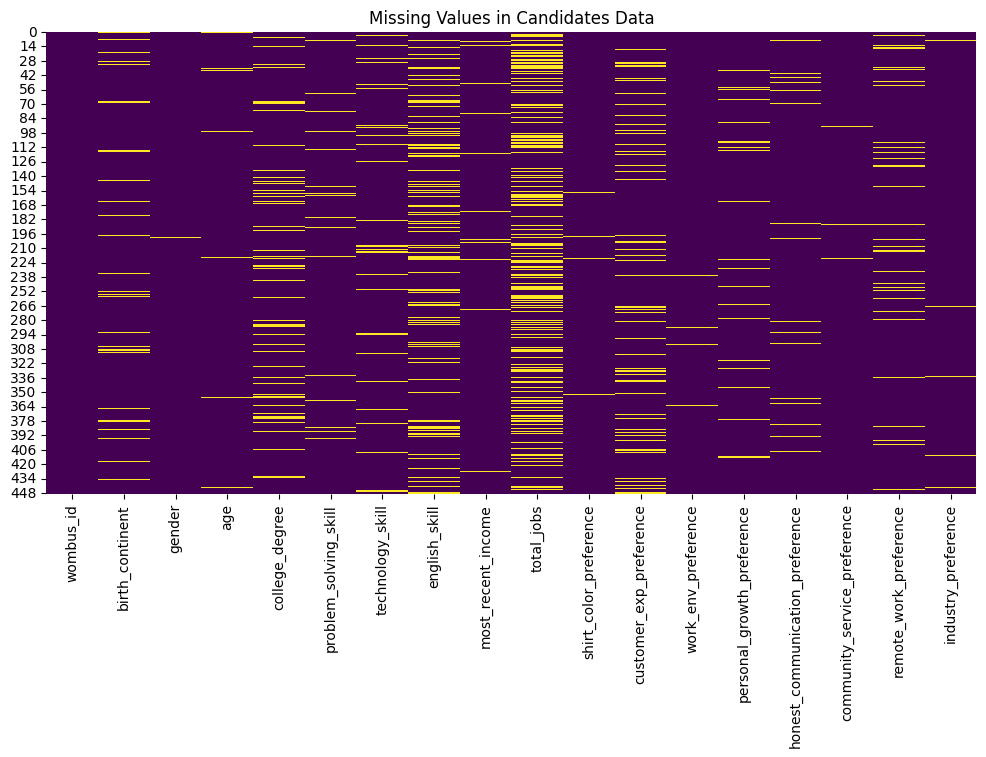

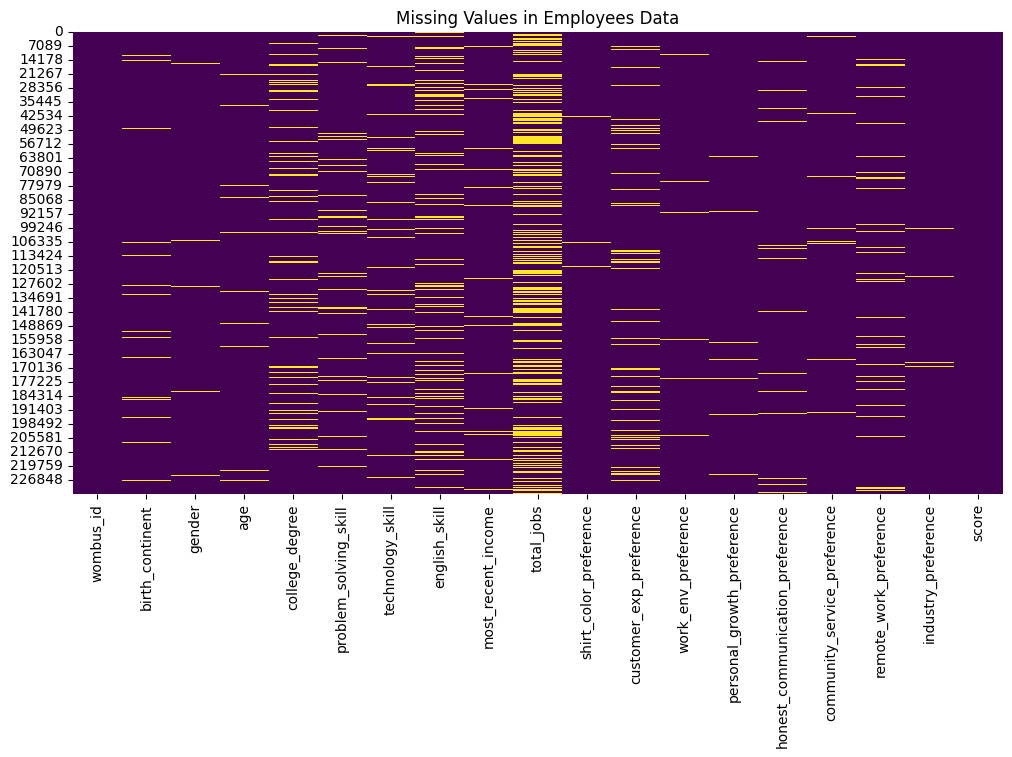

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing missing data for Candidates
plt.figure(figsize=(12, 6))
sns.heatmap(candidates_df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values in Candidates Data")
plt.show()

# Visualizing missing data for Employees
plt.figure(figsize=(12, 6))
sns.heatmap(employees_df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values in Employees Data")
plt.show()

#### 4.2 Distribution of Numerical Features

Visualize the distribution of numerical features like 'age', 'problem_solving_skill', 'technology_skill', 'english_skill', 'total_jobs'.


In [26]:
employees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233936 entries, 0 to 233935
Data columns (total 19 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   wombus_id                        233936 non-null  int64  
 1   birth_continent                  222243 non-null  object 
 2   gender                           231593 non-null  object 
 3   age                              231599 non-null  float64
 4   college_degree                   205860 non-null  float64
 5   problem_solving_skill            224577 non-null  float64
 6   technology_skill                 212869 non-null  float64
 7   english_skill                    194172 non-null  float64
 8   most_recent_income               226915 non-null  float64
 9   total_jobs                       156725 non-null  float64
 10  shirt_color_preference           231596 non-null  object 
 11  customer_exp_preference          205863 non-null  object 
 12  wo

In [27]:
employees_df.score.unique()

array([61.06, 53.2 , 70.18, ..., 34.43, 85.11, 32.17])

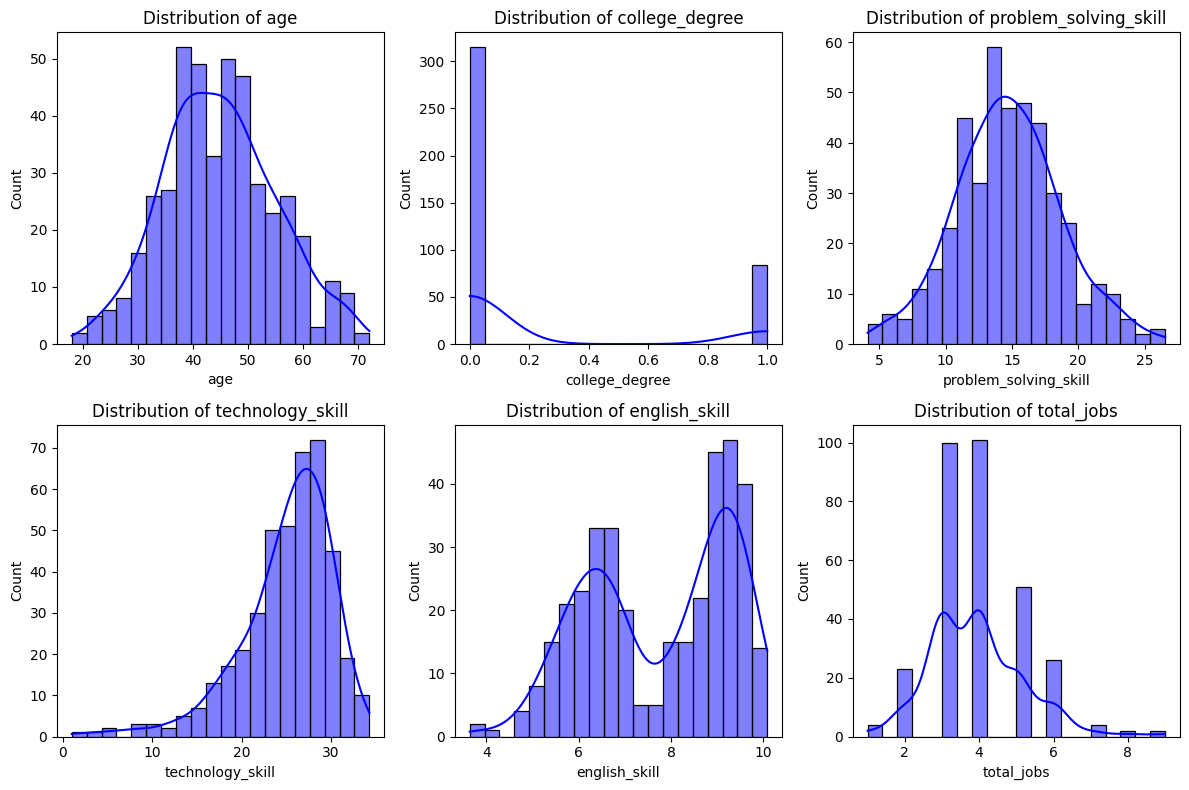

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns for Candidates Data
numerical_cols = [
    "age",
    "college_degree",
    "problem_solving_skill",
    "technology_skill",
    "english_skill",
    "total_jobs",
]

# Plot distribution of these numerical features
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(candidates_df[col].dropna(), kde=True, color="blue", bins=20)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

C:\Users\Nawaz\AppData\Local\Temp\ipykernel_23480\2547174454.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=employees_df, x="gender", y="score", palette="pastel")


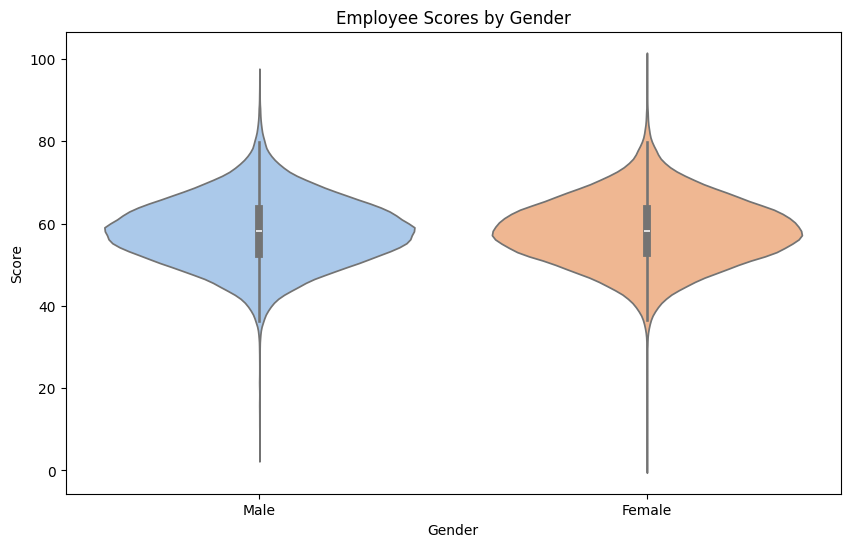

In [29]:
# 4. Violin Plot for Scores by Gender
plt.figure(figsize=(10, 6))
sns.violinplot(data=employees_df, x="gender", y="score", palette="pastel")
plt.title("Employee Scores by Gender")
plt.xlabel("Gender")
plt.ylabel("Score")
plt.show()

### 4.3 Correlation Analysis

We can calculate the correlation between numerical features to check if any features are strongly correlated.


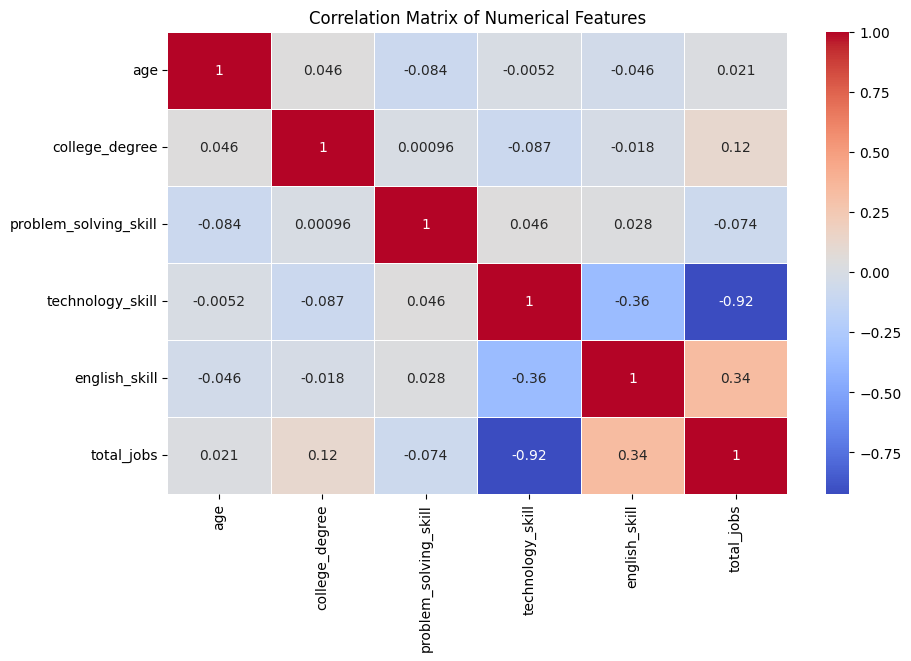

In [30]:
# Correlation matrix for numerical features
corr_matrix = candidates_df[numerical_cols].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [31]:
employees_df.columns

Index(['wombus_id', 'birth_continent', 'gender', 'age', 'college_degree',
       'problem_solving_skill', 'technology_skill', 'english_skill',
       'most_recent_income', 'total_jobs', 'shirt_color_preference',
       'customer_exp_preference', 'work_env_preference',
       'personal_growth_preference', 'honest_communication_preference',
       'community_service_preference', 'remote_work_preference',
       'industry_preference', 'score'],
      dtype='object')

In [32]:
employees_df

,wombus_id,birth_continent,gender,age,college_degree,problem_solving_skill,technology_skill,english_skill,most_recent_income,total_jobs,shirt_color_preference,customer_exp_preference,work_env_preference,personal_growth_preference,honest_communication_preference,community_service_preference,remote_work_preference,industry_preference,score
0,1554,North America,Male,51.0,NaN,NaN,31.522899,8.274305,65213.0,NaN,Purple,Strongly Disagree,Disagree,Agree,Strongly Agree,Strongly Agree,Hybrid,Renewable Energy,61.06
1,1555,North America,Female,48.0,0.0,17.016506,24.785969,9.426865,54693.0,NaN,Blue,Strongly Disagree,Strongly Agree,Strongly Agree,Disagree,Strongly Agree,Hybrid,Finance,53.20
2,1556,NaN,Female,47.0,0.0,NaN,27.225131,5.772313,47381.0,4.0,Purple,Agree,Agree,Agree,Neutral,Strongly Agree,On-Site,Finance,70.18
3,1557,North America,Male,35.0,0.0,20.723280,25.528884,8.825814,44939.0,NaN,Blue,Agree,NaN,Agree,Neutral,Strongly Agree,Hybrid,Tech,58.37
4,1558,Asia,Female,45.0,0.0,15.862225,31.854325,4.140779,57731.0,NaN,Blue,Agree,Strongly Agree,Agree,Neutral,Strongly Agree,Hybrid,Finance,61.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233931,235485,North America,Male,42.0,0.0,17.332522,28.914904,7.537856,53862.0,NaN,Blue,Strongly Agree,Strongly Disagree,Agree,Neutral,Agree,Hybrid,Higher Education,59.15
233932,235486,North America,Female,59.0,0.0,17.754821,27.755353,7.587821,52750.0,4.0,Purple,Neutral,Disagree,Strongly Disagree,Neutral,Strongly Agree,Remote,Higher Education,44.12
233933,235487,North America,Female,36.0,0.0,16.844175,NaN,5.516678,55147.0,3.0,Purple,Agree,Strongly Disagree,Strongly Agree,Strongly Agree,Strongly Agree,Hybrid,Renewable Energy,65.28
233934,235488,Europe,Female,41.0,0.0,11.799902,27.049392,6.406870,68421.0,3.0,Blue,Strongly Agree,Disagree,Agree,Neutral,Disagree,Hybrid,Renewable Energy,61.65


In [33]:
employees_df['gender'] = employees_df['gender'].str.capitalize()  # Capitalize the first letter
employees_df['gender'] = employees_df['gender'].replace({'Female': 'Female', 'Male': 'Male'})

C:\Users\Nawaz\AppData\Local\Temp\ipykernel_23480\4093090968.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  tag = sns.countplot(data=employees_df, x='gender', palette=custom_palette)
C:\Users\Nawaz\AppData\Local\Temp\ipykernel_23480\4093090968.py:11: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  tag = sns.countplot(data=employees_df, x='gender', palette=custom_palette)


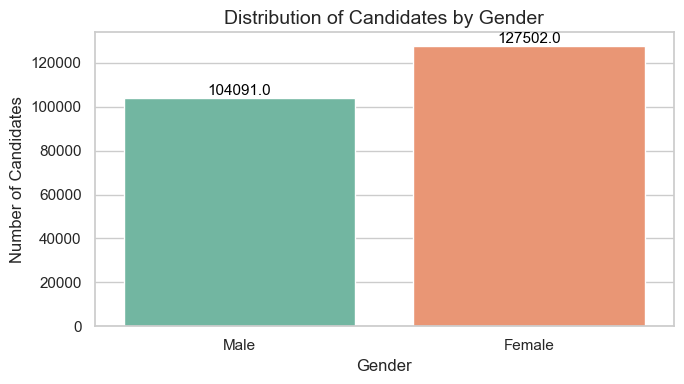

In [34]:
# Set a theme for better aesthetics
sns.set_theme(style="whitegrid")

# Set a color palette
custom_palette = sns.color_palette("Set2")

# Create a figure with appropriate size
plt.figure(figsize=(7, 4))

# Count plot for 'gender' with custom colors
tag = sns.countplot(data=employees_df, x='gender', palette=custom_palette)

# Add annotations to each bar
for i in tag.patches:
    tag.annotate(f'{i.get_height()}', 
                 (i.get_x() + i.get_width() / 2., i.get_height()), 
                 ha='center', 
                 va='bottom', 
                 fontsize=11, 
                 color='black')

# Set title and labels
plt.title('Distribution of Candidates by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Candidates', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

# Group by 'gender' and calculate the mean and median for selected columns
grouped_stats = employees_df.groupby('gender')[['age', 'problem_solving_skill', 'technology_skill', 'score']].agg(['mean', 'median']).reset_index()


C:\Users\Nawaz\AppData\Local\Temp\ipykernel_23480\1256877457.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(data=employees_df, x='birth_continent', palette=custom_palette)
C:\Users\Nawaz\AppData\Local\Temp\ipykernel_23480\1256877457.py:9: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  plot = sns.countplot(data=employees_df, x='birth_continent', palette=custom_palette)


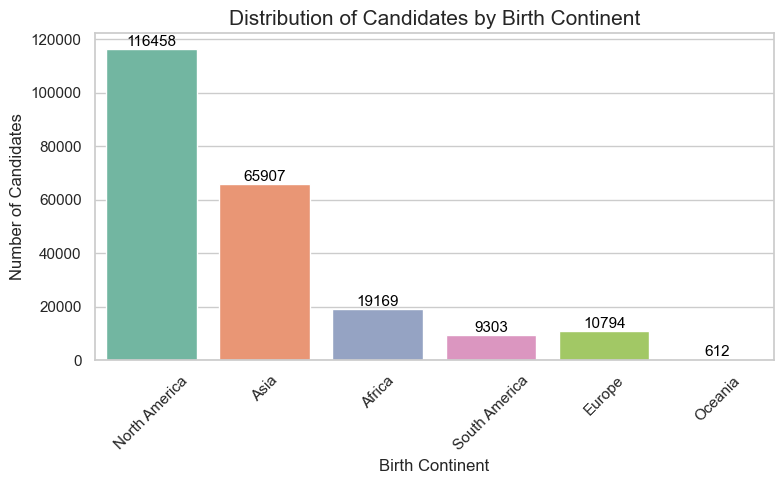

In [35]:
# Set a theme and color palette for better aesthetics
sns.set_theme(style="whitegrid")
custom_palette = sns.color_palette("Set2")  # Using a soft color palette for better clarity

# Create a figure with appropriate size
plt.figure(figsize=(8, 5))

# Count plot for 'birth_continent' with custom colors
plot = sns.countplot(data=employees_df, x='birth_continent', palette=custom_palette)

# Add annotations to each bar
for p in plot.patches:
    plot.annotate(f'{int(p.get_height())}', 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha='center', 
                  va='bottom', 
                  fontsize=11, 
                  color='black')

# Set title and labels
plt.title('Distribution of Candidates by Birth Continent', fontsize=15)
plt.xlabel('Birth Continent', fontsize=12)
plt.ylabel('Number of Candidates', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

# Group by 'birth_continent' and calculate the mean and median for selected columns
grouped_stats = employees_df.groupby('birth_continent')[['problem_solving_skill', 'technology_skill', 'english_skill']].agg(['mean', 'median']).reset_index()


C:\Users\Nawaz\AppData\Local\Temp\ipykernel_23480\1094059156.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=employees_df, x='birth_continent', palette=custom_palette)
C:\Users\Nawaz\AppData\Local\Temp\ipykernel_23480\1094059156.py:12: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.countplot(data=employees_df, x='birth_continent', palette=custom_palette)


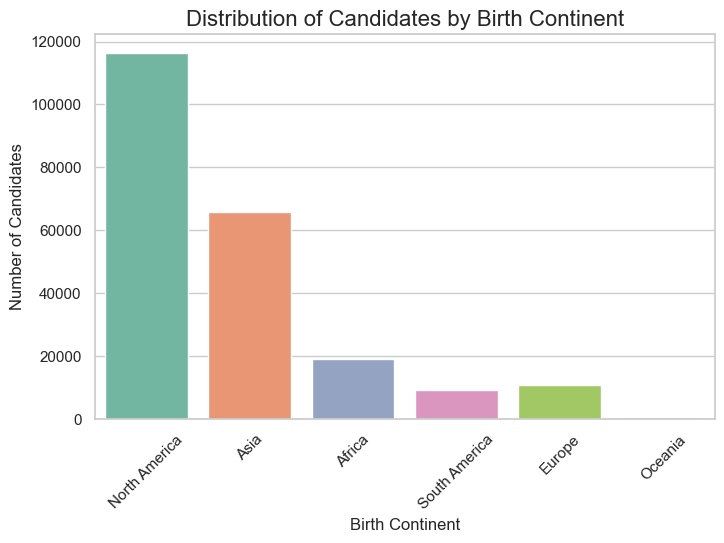

C:\Users\Nawaz\AppData\Local\Temp\ipykernel_23480\1094059156.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='birth_continent', y=('score', 'mean'), data=grouped, palette="Blues_d")


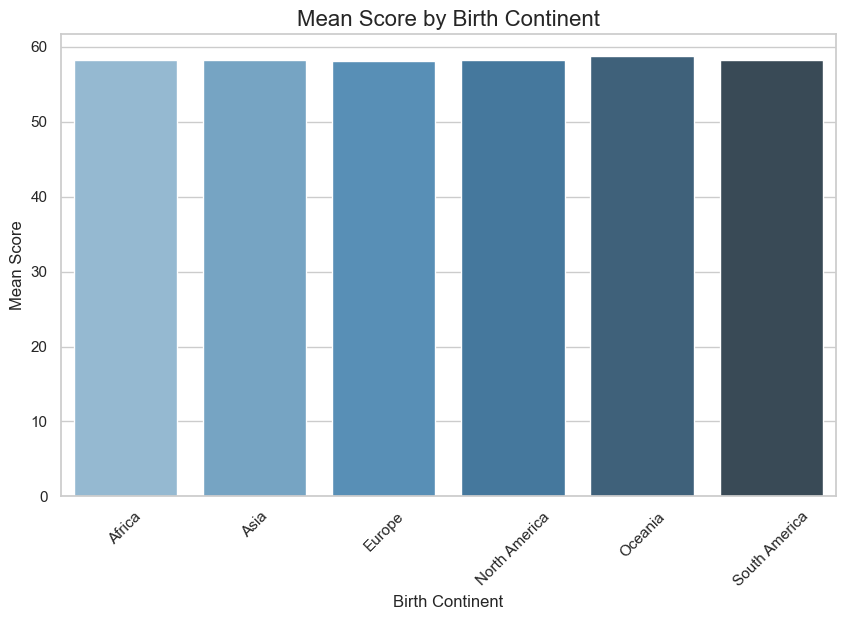

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a colorful theme
sns.set_theme(style="whitegrid")

# Define a custom color palette
custom_palette = sns.color_palette("Set2")

# Create a count plot for 'birth_continent' with custom colors
plt.figure(figsize=(8, 5))
sns.countplot(data=employees_df, x='birth_continent', palette=custom_palette)
plt.title('Distribution of Candidates by Birth Continent', fontsize=16)
plt.xlabel('Birth Continent', fontsize=12)
plt.ylabel('Number of Candidates', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Group by 'birth_continent' and calculate mean and median for numeric columns, and visualize the result
grouped = employees_df.groupby(['birth_continent'])[['age', 'problem_solving_skill', 'technology_skill', 'english_skill', 'most_recent_income', 'score']].agg(['mean', 'median']).reset_index()

# Plot grouped data for 'score' (Mean and Median by birth_continent)
plt.figure(figsize=(10, 6))
sns.barplot(x='birth_continent', y=('score', 'mean'), data=grouped, palette="Blues_d")
plt.title('Mean Score by Birth Continent', fontsize=16)
plt.xlabel('Birth Continent', fontsize=12)
plt.ylabel('Mean Score', fontsize=12)
plt.xticks(rotation=45)
plt.show()


C:\Users\Nawaz\AppData\Local\Temp\ipykernel_23480\1512958431.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(data=employees_df, x='industry_preference', palette=custom_palette)
C:\Users\Nawaz\AppData\Local\Temp\ipykernel_23480\1512958431.py:9: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  plot = sns.countplot(data=employees_df, x='industry_preference', palette=custom_palette)


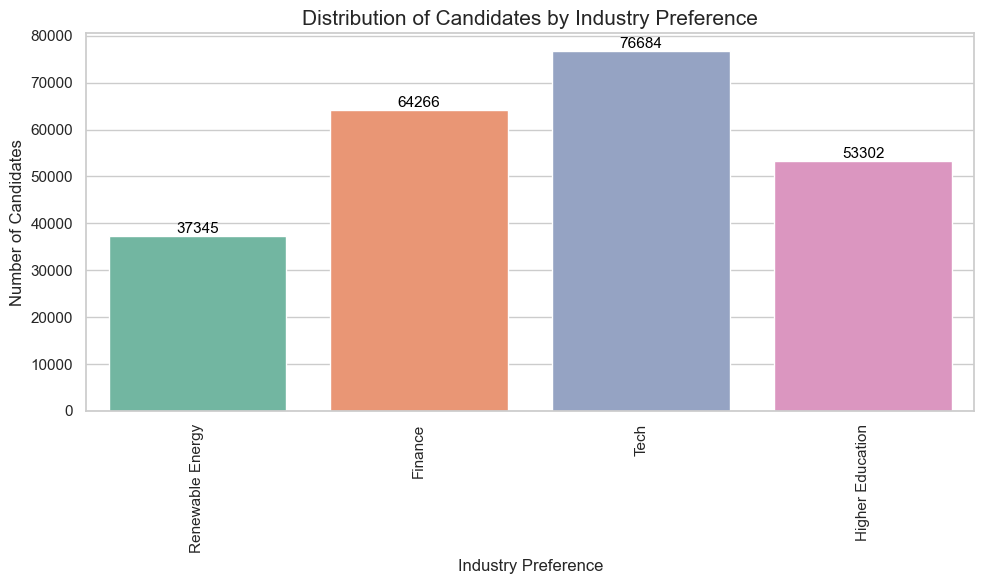

In [37]:
# Set a theme and color palette for better aesthetics
sns.set_theme(style="whitegrid")
custom_palette = sns.color_palette("Set2")  # Using a soft color palette for better clarity

# Create a figure with appropriate size
plt.figure(figsize=(10, 6))

# Count plot for 'industry_preference' with custom colors
plot = sns.countplot(data=employees_df, x='industry_preference', palette=custom_palette)

# Add annotations to each bar
for p in plot.patches:
    plot.annotate(f'{int(p.get_height())}', 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha='center', 
                  va='bottom', 
                  fontsize=11, 
                  color='black')

# Set title and labels
plt.title('Distribution of Candidates by Industry Preference', fontsize=15)
plt.xlabel('Industry Preference', fontsize=12)
plt.ylabel('Number of Candidates', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()

# Group by 'industry_preference' and calculate the mean and median for selected skill columns
grouped_stats = employees_df.groupby('industry_preference')[['problem_solving_skill', 'technology_skill', 'english_skill']].agg(['mean', 'median']).reset_index()


C:\Users\Nawaz\AppData\Local\Temp\ipykernel_23480\1078716444.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(data=employees_df, x='remote_work_preference', palette=custom_palette)
C:\Users\Nawaz\AppData\Local\Temp\ipykernel_23480\1078716444.py:9: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  plot = sns.countplot(data=employees_df, x='remote_work_preference', palette=custom_palette)


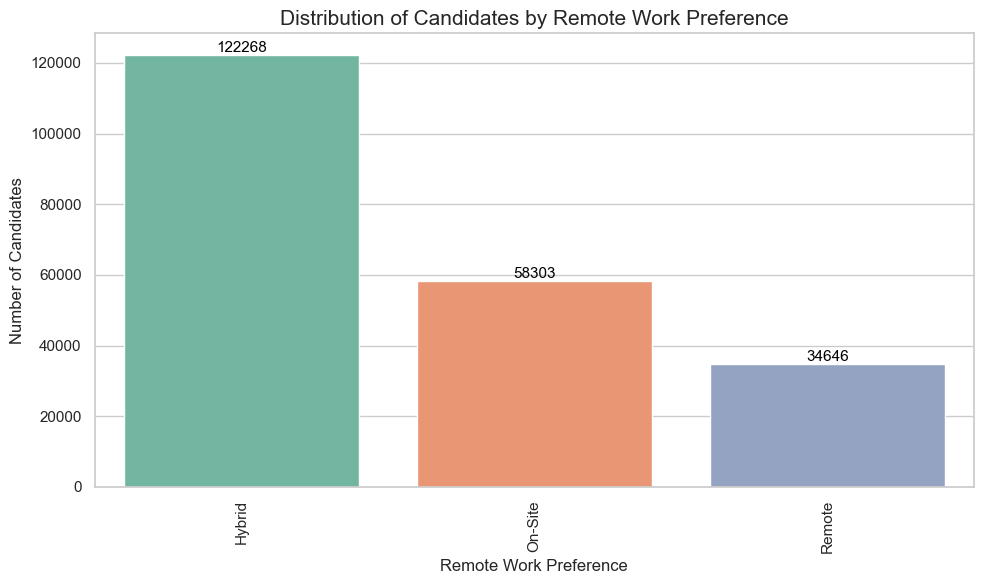

In [38]:
# Set a theme and color palette for better aesthetics
sns.set_theme(style="whitegrid")
custom_palette = sns.color_palette("Set2")  # Using a soft color palette for better clarity

# Create a figure with appropriate size
plt.figure(figsize=(10, 6))

# Count plot for 'remote_work_preference' with custom colors
plot = sns.countplot(data=employees_df, x='remote_work_preference', palette=custom_palette)

# Add annotations to each bar
for p in plot.patches:
    plot.annotate(f'{int(p.get_height())}', 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha='center', 
                  va='bottom', 
                  fontsize=11, 
                  color='black')

# Set title and labels
plt.title('Distribution of Candidates by Remote Work Preference', fontsize=15)
plt.xlabel('Remote Work Preference', fontsize=12)
plt.ylabel('Number of Candidates', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()

# Group by 'remote_work_preference' and calculate the mean and median for selected skill columns
grouped_stats = employees_df.groupby('remote_work_preference')[['problem_solving_skill', 'technology_skill', 'english_skill']].agg(['mean', 'median']).reset_index()


C:\Users\Nawaz\AppData\Local\Temp\ipykernel_23480\2660890589.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(data=employees_df, x='total_jobs', palette=custom_palette)
C:\Users\Nawaz\AppData\Local\Temp\ipykernel_23480\2660890589.py:5: UserWarning: 
The palette list has fewer values (8) than needed (11) and will cycle, which may produce an uninterpretable plot.
  plot = sns.countplot(data=employees_df, x='total_jobs', palette=custom_palette)


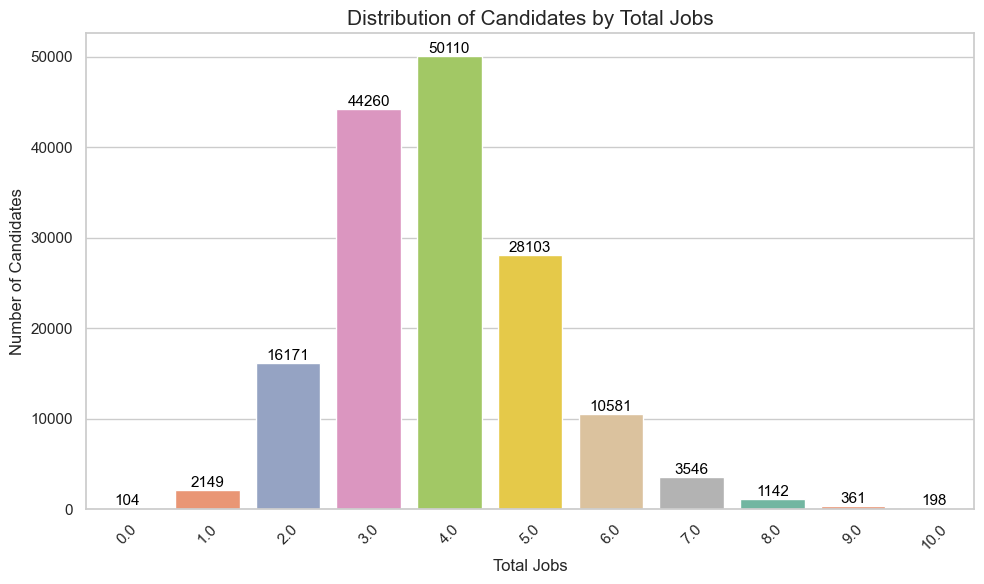

   total_jobs      score        
                    mean  median
0         0.0  20.119615  21.115
1         1.0  59.012946  59.140
2         2.0  58.583151  58.630
3         3.0  58.313355  58.310
4         4.0  58.115357  58.070
5         5.0  58.171034  58.010
6         6.0  58.206311  57.770
7         7.0  58.076184  57.700
8         8.0  58.065359  57.250
9         9.0  57.636150  56.660
10       10.0  56.363737  55.640


In [39]:
# Create a figure with appropriate size
plt.figure(figsize=(10, 6))

# Count plot for 'number_of_siblings' with custom colors
plot = sns.countplot(data=employees_df, x='total_jobs', palette=custom_palette)

# Add annotations to each bar
for p in plot.patches:
    plot.annotate(f'{int(p.get_height())}', 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha='center', 
                  va='bottom', 
                  fontsize=11, 
                  color='black')

# Set title and labels
plt.title('Distribution of Candidates by Total Jobs', fontsize=15)
plt.xlabel('Total Jobs', fontsize=12)
plt.ylabel('Number of Candidates', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

# Group by 'total_jobs' and calculate the mean and median for 'score'
grouped_stats = employees_df.groupby('total_jobs')[['score']].agg(['mean', 'median']).reset_index()

# Print the grouped statistics
print(grouped_stats)

#### **Method 1A: Removing *null* values in the dataset**

Some columns have ***null*** values. However, we will check the best method to handle those missing values.

Also, the Dtype for the few colunns is ***float64***. This is not the correct datatype because the column contains *discrete* variables. The datatype for this column should be changed to ***int64***.

In [40]:
df_emp  = employees_df.copy()
df_cand = candidates_df.copy()

In [41]:
print(f"INFO: Before dropping missing values, df_emp shape: {df_emp.shape}")
df_emp.dropna(how="any", inplace=True)
print(f"INFO: After dropping missing values, df_emp shape: {df_emp.shape}")
print(f"INFO: Displaying the first few rows of df_emp after dropping NaNs:")
df_emp

INFO: Before dropping missing values, df_emp shape: (233936, 19)
INFO: After dropping missing values, df_emp shape: (65616, 19)
INFO: Displaying the first few rows of df_emp after dropping NaNs:


,wombus_id,birth_continent,gender,age,college_degree,problem_solving_skill,technology_skill,english_skill,most_recent_income,total_jobs,shirt_color_preference,customer_exp_preference,work_env_preference,personal_growth_preference,honest_communication_preference,community_service_preference,remote_work_preference,industry_preference,score
6,1560,North America,Male,47.0,0.0,10.598648,26.529753,9.386864,71583.0,3.0,Blue,Agree,Strongly Agree,Agree,Strongly Disagree,Strongly Agree,Hybrid,Higher Education,59.96
7,1561,Africa,Male,67.0,0.0,15.010481,25.382305,6.452992,59972.0,4.0,Purple,Disagree,Disagree,Neutral,Strongly Disagree,Strongly Agree,Hybrid,Finance,52.37
8,1562,North America,Male,39.0,0.0,13.553051,24.696864,9.142987,63808.0,4.0,Purple,Strongly Disagree,Strongly Agree,Strongly Disagree,Neutral,Neutral,Hybrid,Finance,42.72
13,1567,North America,Female,36.0,0.0,11.885339,30.827703,7.348390,68196.0,3.0,Purple,Neutral,Neutral,Agree,Strongly Agree,Agree,Remote,Tech,70.00
14,1568,North America,Male,36.0,0.0,20.136346,29.285150,8.682890,46483.0,3.0,Blue,Neutral,Strongly Agree,Agree,Agree,Strongly Agree,On-Site,Finance,60.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233926,235480,Africa,Male,33.0,0.0,21.480780,25.105973,6.054777,42945.0,4.0,Blue,Strongly Disagree,Disagree,Agree,Neutral,Disagree,Remote,Finance,36.70
233927,235481,Asia,Male,34.0,0.0,16.830562,23.898258,6.437525,55183.0,5.0,Purple,Strongly Disagree,Neutral,Agree,Strongly Disagree,Strongly Agree,On-Site,Higher Education,49.28
233932,235486,North America,Female,59.0,0.0,17.754821,27.755353,7.587821,52750.0,4.0,Purple,Neutral,Disagree,Strongly Disagree,Neutral,Strongly Agree,Remote,Higher Education,44.12
233934,235488,Europe,Female,41.0,0.0,11.799902,27.049392,6.406870,68421.0,3.0,Blue,Strongly Agree,Disagree,Agree,Neutral,Disagree,Hybrid,Renewable Energy,61.65


In [42]:

df_emp.to_csv('Wombi-Data-Analysis-NA-Removed.csv', index=False)

#### **Method 2: Use *Mode Imputation***

The values for the columns with *null* data are contains categorical and binary data. To avoid over-representing certain data, we set a limit to null values equal to or less than **5.0%** of the total number of data in their respective column. 

### 4.3 Candidates


In [43]:
# Converting recruits' most recent income to float
candidates_df["most_recent_income"] = candidates_df["most_recent_income"].apply(
    lambda x: float(str(x).replace(",", ""))
)

# Display the first few rows to verify changes
print("INFO: First few rows after converting 'most_recent_income' to float:")
print(candidates_df.head())

INFO: First few rows after converting 'most_recent_income' to float:
   wombus_id birth_continent  gender   age  college_degree  \
0       1105             NaN  Female   NaN             0.0   
1       1106   North America  Female  52.0             1.0   
2       1107   North America    Male  32.0             0.0   
3       1108          Africa    Male  49.0             0.0   
4       1109   North America    Male  47.0             0.0   

   problem_solving_skill  technology_skill  english_skill  most_recent_income  \
0               8.400397         23.348271       9.105426             77367.0   
1               7.787927         24.799825       9.095713             78979.0   
2              23.005739         25.484927       8.967305             38932.0   
3              15.565866               NaN       5.914387             58511.0   
4              12.784366         30.619283       8.751296             65831.0   

   total_jobs shirt_color_preference customer_exp_preference  \
0      

In [44]:
candidates_df.head()

,wombus_id,birth_continent,gender,age,college_degree,problem_solving_skill,technology_skill,english_skill,most_recent_income,total_jobs,shirt_color_preference,customer_exp_preference,work_env_preference,personal_growth_preference,honest_communication_preference,community_service_preference,remote_work_preference,industry_preference
0,1105,NaN,Female,NaN,0.0,8.400397,23.348271,9.105426,77367.0,5.0,Purple,Strongly Disagree,Strongly Agree,Agree,Neutral,Strongly Agree,Hybrid,Higher Education
1,1106,North America,Female,52.0,1.0,7.787927,24.799825,9.095713,78979.0,4.0,Blue,Neutral,Strongly Disagree,Disagree,Strongly Agree,Strongly Agree,Hybrid,Finance
2,1107,North America,Male,32.0,0.0,23.005739,25.484927,8.967305,38932.0,NaN,Blue,Strongly Disagree,Disagree,Agree,Agree,Neutral,On-Site,Finance
3,1108,Africa,Male,49.0,0.0,15.565866,NaN,5.914387,58511.0,NaN,Purple,Disagree,Strongly Agree,Agree,Neutral,Strongly Agree,NaN,Tech
4,1109,North America,Male,47.0,0.0,12.784366,30.619283,8.751296,65831.0,NaN,Purple,Strongly Disagree,Disagree,Neutral,Strongly Agree,Strongly Agree,On-Site,Renewable Energy


### 4.4 Median values for some of the candidate variables


In [45]:
# Finding the mean values for some of the recruit variables to impute missing data
age = candidates_df["age"].mean()
income = candidates_df["most_recent_income"].mean()
tech_skill = candidates_df["technology_skill"].mean()
eng_skill = candidates_df["english_skill"].mean()
solving_skill = candidates_df["problem_solving_skill"].mean()
total_jobs = candidates_df["total_jobs"].mean()

# Print mean values for verification
print(f"The mean value for age is {age:.2f} years old.")
print(f"The mean value for most recent income is {income:.2f} WombiCoin.")
print(f"The mean value for technology skill is {tech_skill:.2f}.")
print(f"The mean value for English skill is {eng_skill:.2f}.")
print(f"The mean value for problem-solving skill is {solving_skill:.2f}.")
print(f"The mean value for total jobs is {total_jobs:.2f}.")

The mean value for age is 44.84 years old.
The mean value for most recent income is 60587.25 WombiCoin.
The mean value for technology skill is 25.03.
The mean value for English skill is 7.76.
The mean value for problem-solving skill is 14.73.
The mean value for total jobs is 3.92.


In [46]:
# Finding the mode for some of the recruit variables to impute missing data
birth = candidates_df["birth_continent"].mode()[0]
gender = candidates_df["gender"].mode()[0]
work_env = candidates_df["work_env_preference"].mode()[0]
growth = candidates_df["personal_growth_preference"].mode()[0]
comm = candidates_df["honest_communication_preference"].mode()[0]
service = candidates_df["community_service_preference"].mode()[0]
remote = candidates_df["remote_work_preference"].mode()[0]
industry = candidates_df["industry_preference"].mode()[0]
shirt = candidates_df["shirt_color_preference"].mode()[0]

# Print mode values for verification
print(f"The mode for birth continent is {birth}.")
print(f"The mode for gender is {gender}.")
print(f"The mode for work environment preference is {work_env}.")
print(f"The mode for personal growth preference is {growth}.")
print(f"The mode for communication preference is {comm}.")
print(f"The mode for community service preference is {service}.")
print(f"The mode for remote work preference is {remote}.")
print(f"The mode for industry preference is {industry}.")
print(f"The mode for shirt color preference is {shirt}.")

The mode for birth continent is North America.
The mode for gender is Female.
The mode for work environment preference is Strongly Agree.
The mode for personal growth preference is Agree.
The mode for communication preference is Neutral.
The mode for community service preference is Strongly Agree.
The mode for remote work preference is Hybrid.
The mode for industry preference is Tech.
The mode for shirt color preference is Purple.


### 4.5 Missing Values Imputation in the dataset


In [47]:

# Imputing missing values for recruit data
candidates_df["birth_continent"].fillna("North America", inplace=True)
candidates_df["gender"].fillna("Female", inplace=True)
candidates_df["age"].fillna(44.8438914, inplace=True)
candidates_df["college_degree"].fillna("0.0", inplace=True)
candidates_df["most_recent_income"].fillna(60587.248858447, inplace=True)
candidates_df["total_jobs"].fillna(7.7582866622, inplace=True)
candidates_df["technology_skill"].fillna(25.027173413425164, inplace=True)
candidates_df["english_skill"].fillna(7.7582866621766, inplace=True)
candidates_df["problem_solving_skill"].fillna(14.72620142930947, inplace=True)
candidates_df["customer_exp_preference"].fillna("Unsure", inplace=True)
candidates_df["work_env_preference"].fillna("Strongly Agree", inplace=True)
candidates_df["personal_growth_preference"].fillna("Agree", inplace=True)
candidates_df["shirt_color_preference"].fillna("Purple", inplace=True)
candidates_df["honest_communication_preference"].fillna("Neutral", inplace=True)
candidates_df["community_service_preference"].fillna("Strongly Agree", inplace=True)
candidates_df["remote_work_preference"].fillna("Hybrid", inplace=True)
candidates_df["industry_preference"].fillna("Tech", inplace=True)

C:\Users\Nawaz\AppData\Local\Temp\ipykernel_23480\354401529.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  candidates_df["college_degree"].fillna("0.0", inplace=True)


In [48]:
# Checking the manipulated dataframe:
candidates_df.head(n=20)

,wombus_id,birth_continent,gender,age,college_degree,problem_solving_skill,technology_skill,english_skill,most_recent_income,total_jobs,shirt_color_preference,customer_exp_preference,work_env_preference,personal_growth_preference,honest_communication_preference,community_service_preference,remote_work_preference,industry_preference
0,1105,North America,Female,44.843891,0.0,8.400397,23.348271,9.105426,77367.000000,5.000000,Purple,Strongly Disagree,Strongly Agree,Agree,Neutral,Strongly Agree,Hybrid,Higher Education
1,1106,North America,Female,52.000000,1.0,7.787927,24.799825,9.095713,78979.000000,4.000000,Blue,Neutral,Strongly Disagree,Disagree,Strongly Agree,Strongly Agree,Hybrid,Finance
2,1107,North America,Male,32.000000,0.0,23.005739,25.484927,8.967305,38932.000000,7.758287,Blue,Strongly Disagree,Disagree,Agree,Agree,Neutral,On-Site,Finance
3,1108,Africa,Male,49.000000,0.0,15.565866,25.027173,5.914387,58511.000000,7.758287,Purple,Disagree,Strongly Agree,Agree,Neutral,Strongly Agree,Hybrid,Tech
4,1109,North America,Male,47.000000,0.0,12.784366,30.619283,8.751296,65831.000000,7.758287,Purple,Strongly Disagree,Disagree,Neutral,Strongly Agree,Strongly Agree,On-Site,Renewable Energy
5,1110,North America,Male,41.000000,0.0,23.585086,27.179060,9.042111,37408.000000,3.000000,Purple,Strongly Disagree,Disagree,Agree,Neutral,Strongly Agree,Hybrid,Finance
6,1111,Africa,Female,54.000000,0.0,14.478490,27.205718,4.806768,61372.000000,4.000000,Purple,Disagree,Disagree,Agree,Disagree,Strongly Agree,Hybrid,Higher Education
7,1112,North America,Male,54.000000,1.0,17.664610,23.039488,6.377980,52988.000000,5.000000,Purple,Strongly Agree,Disagree,Disagree,Neutral,Strongly Agree,Hybrid,Higher Education
8,1113,Asia,Male,40.000000,0.0,14.726201,24.277833,7.758287,53792.000000,7.758287,Purple,Agree,Disagree,Agree,Neutral,Strongly Agree,Hybrid,Tech
9,1114,North America,Male,57.000000,0.0,16.822555,29.276798,8.124911,60587.248858,3.000000,Purple,Neutral,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Hybrid,Higher Education


In [49]:
for col in candidates_df.columns:
    print('Null Values for column {} is {}%'.format(col, np.round(candidates_df[col].isnull().sum()*100 / len(candidates_df[col])),2))

Null Values for column wombus_id is 0.0%
Null Values for column birth_continent is 0.0%
Null Values for column gender is 0.0%
Null Values for column age is 0.0%
Null Values for column college_degree is 0.0%
Null Values for column problem_solving_skill is 0.0%
Null Values for column technology_skill is 0.0%
Null Values for column english_skill is 0.0%
Null Values for column most_recent_income is 0.0%
Null Values for column total_jobs is 0.0%
Null Values for column shirt_color_preference is 0.0%
Null Values for column customer_exp_preference is 0.0%
Null Values for column work_env_preference is 0.0%
Null Values for column personal_growth_preference is 0.0%
Null Values for column honest_communication_preference is 0.0%
Null Values for column community_service_preference is 0.0%
Null Values for column remote_work_preference is 0.0%
Null Values for column industry_preference is 0.0%


### Employess


In [50]:
# Convert text to lowercase in columns: 'birth_continent', 'gender' and 8 other columns
employees_df['birth_continent'] = employees_df['birth_continent'].str.lower()
employees_df['gender'] = employees_df['gender'].str.lower()
employees_df['shirt_color_preference'] = employees_df['shirt_color_preference'].str.lower()
employees_df['customer_exp_preference'] = employees_df['customer_exp_preference'].str.lower()
employees_df['work_env_preference'] = employees_df['work_env_preference'].str.lower()
employees_df['personal_growth_preference'] = employees_df['personal_growth_preference'].str.lower()
employees_df['honest_communication_preference'] = employees_df['honest_communication_preference'].str.lower()
employees_df['community_service_preference'] = employees_df['community_service_preference'].str.lower()
employees_df['remote_work_preference'] = employees_df['remote_work_preference'].str.lower()
employees_df['industry_preference'] = employees_df['industry_preference'].str.lower()

In [51]:
# Converting employees' most recent income to float
employees_df["most_recent_income"] = employees_df["most_recent_income"].apply(
    lambda x: float(str(x).replace(",", ""))
)

# Display the first few rows to verify changes
print("INFO: First few rows after converting 'most_recent_income' to float:")
employees_df.head()

INFO: First few rows after converting 'most_recent_income' to float:


,wombus_id,birth_continent,gender,age,college_degree,problem_solving_skill,technology_skill,english_skill,most_recent_income,total_jobs,shirt_color_preference,customer_exp_preference,work_env_preference,personal_growth_preference,honest_communication_preference,community_service_preference,remote_work_preference,industry_preference,score
0,1554,north america,male,51.0,NaN,NaN,31.522899,8.274305,65213.0,NaN,purple,strongly disagree,disagree,agree,strongly agree,strongly agree,hybrid,renewable energy,61.06
1,1555,north america,female,48.0,0.0,17.016506,24.785969,9.426865,54693.0,NaN,blue,strongly disagree,strongly agree,strongly agree,disagree,strongly agree,hybrid,finance,53.20
2,1556,NaN,female,47.0,0.0,NaN,27.225131,5.772313,47381.0,4.0,purple,agree,agree,agree,neutral,strongly agree,on-site,finance,70.18
3,1557,north america,male,35.0,0.0,20.723280,25.528884,8.825814,44939.0,NaN,blue,agree,NaN,agree,neutral,strongly agree,hybrid,tech,58.37
4,1558,asia,female,45.0,0.0,15.862225,31.854325,4.140779,57731.0,NaN,blue,agree,strongly agree,agree,neutral,strongly agree,hybrid,finance,61.77


In [52]:
# Finding the mean or median value for some of the employee variables to impute data
age = employees_df["age"].mean()
income = employees_df["most_recent_income"].mean()
tech_skill = employees_df["technology_skill"].mean()
eng_skill = employees_df["english_skill"].mean()
solving_skill = employees_df["problem_solving_skill"].median()

# Printing the calculated mean/median values
print(f"The mean value for age is {age:.2f} years old.")
print(f"The mean value for most recent income is {income:.2f} WombiCoin.")
print(f"The mean value for technology skill is {tech_skill:.2f}.")
print(f"The mean value for English skill is {eng_skill:.2f}.")
print(f"The median value for problem-solving skill is {solving_skill:.2f}.")

The mean value for age is 44.99 years old.
The mean value for most recent income is 60010.87 WombiCoin.
The mean value for technology skill is 25.42.
The mean value for English skill is 7.65.
The median value for problem-solving skill is 14.99.


In [53]:
# Finding the mode for some of the employee variables to impute data
birth = employees_df["birth_continent"].mode()[0]
gender = employees_df["gender"].mode()[0]
work_env = employees_df["work_env_preference"].mode()[0]
growth = employees_df["personal_growth_preference"].mode()[0]
comm = employees_df["honest_communication_preference"].mode()[0]
service = employees_df["community_service_preference"].mode()[0]
remote = employees_df["remote_work_preference"].mode()[0]
industry = employees_df["industry_preference"].mode()[0]
shirt = employees_df["shirt_color_preference"].mode()[0]

# Printing the mode values
print("The mode for birth continent is " + birth + ".")
print("The mode for gender is " + gender + ".")
print("The mode for work environment is " + work_env + ".")
print("The mode for personal growth experience is " + growth + ".")
print("The mode for communication preference is " + comm + ".")
print("The mode for community service preference is " + service + ".")
print("The mode for remote work preference is " + remote + " work.")
print("The mode for industry preference is the " + industry + ".")
print("The mode for shirt color preference is a " + shirt + " shirt.")

The mode for birth continent is north america.
The mode for gender is female.
The mode for work environment is strongly agree.
The mode for personal growth experience is agree.
The mode for communication preference is neutral.
The mode for community service preference is strongly agree.
The mode for remote work preference is hybrid work.
The mode for industry preference is the tech.
The mode for shirt color preference is a purple shirt.


In [54]:
# Imputing missing values for employee data
employees_df["birth_continent"].fillna("North America", inplace=True)
employees_df["gender"].fillna("Female", inplace=True)
employees_df["age"].fillna(45.0, inplace=True)  # Imputing with mean/median age
employees_df["college_degree"].fillna("0.0", inplace=True)
employees_df["most_recent_income"].fillna(
    60010.0, inplace=True
)  # Imputing with mean income
employees_df["total_jobs"].fillna("0.0", inplace=True)
employees_df["english_skill"].fillna(
    7.9319140835, inplace=True
)  # Imputing with mean skill level
employees_df["technology_skill"].fillna(
    26.3804767, inplace=True
)  # Imputing with mean skill level
employees_df["problem_solving_skill"].fillna(
    14.99398769, inplace=True
)  # Imputing with median
employees_df["customer_exp_preference"].fillna("0.0", inplace=True)
employees_df["work_env_preference"].fillna("Strongly Agree", inplace=True)
employees_df["personal_growth_preference"].fillna("Agree", inplace=True)
employees_df["shirt_color_preference"].fillna("Purple", inplace=True)
employees_df["honest_communication_preference"].fillna("Neutral", inplace=True)
employees_df["community_service_preference"].fillna("Strongly Agree", inplace=True)
employees_df["remote_work_preference"].fillna("Hybrid", inplace=True)
employees_df["industry_preference"].fillna("Tech", inplace=True)

# Checking the dataframe to ensure missing values are imputed
employees_df.head(20)

C:\Users\Nawaz\AppData\Local\Temp\ipykernel_23480\114605546.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  employees_df["college_degree"].fillna("0.0", inplace=True)
C:\Users\Nawaz\AppData\Local\Temp\ipykernel_23480\114605546.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  employees_df["total_jobs"].fillna("0.0", inplace=True)


,wombus_id,birth_continent,gender,age,college_degree,problem_solving_skill,technology_skill,english_skill,most_recent_income,total_jobs,shirt_color_preference,customer_exp_preference,work_env_preference,personal_growth_preference,honest_communication_preference,community_service_preference,remote_work_preference,industry_preference,score
0,1554,north america,male,51.0,0.0,14.993988,31.522899,8.274305,65213.0,0.0,purple,strongly disagree,disagree,agree,strongly agree,strongly agree,hybrid,renewable energy,61.06
1,1555,north america,female,48.0,0.0,17.016506,24.785969,9.426865,54693.0,0.0,blue,strongly disagree,strongly agree,strongly agree,disagree,strongly agree,hybrid,finance,53.20
2,1556,North America,female,47.0,0.0,14.993988,27.225131,5.772313,47381.0,4.0,purple,agree,agree,agree,neutral,strongly agree,on-site,finance,70.18
3,1557,north america,male,35.0,0.0,20.723280,25.528884,8.825814,44939.0,0.0,blue,agree,Strongly Agree,agree,neutral,strongly agree,hybrid,tech,58.37
4,1558,asia,female,45.0,0.0,15.862225,31.854325,4.140779,57731.0,0.0,blue,agree,strongly agree,agree,neutral,strongly agree,hybrid,finance,61.77
5,1559,north america,male,55.0,0.0,14.725214,22.168891,9.496525,60723.0,5.0,purple,0.0,strongly agree,agree,neutral,strongly agree,on-site,tech,69.63
6,1560,north america,male,47.0,0.0,10.598648,26.529753,9.386864,71583.0,3.0,blue,agree,strongly agree,agree,strongly disagree,strongly agree,hybrid,higher education,59.96
7,1561,africa,male,67.0,0.0,15.010481,25.382305,6.452992,59972.0,4.0,purple,disagree,disagree,neutral,strongly disagree,strongly agree,hybrid,finance,52.37
8,1562,north america,male,39.0,0.0,13.553051,24.696864,9.142987,63808.0,4.0,purple,strongly disagree,strongly agree,strongly disagree,neutral,neutral,hybrid,finance,42.72
9,1563,north america,female,55.0,0.0,21.202096,30.773384,8.406603,43679.0,0.0,purple,strongly agree,strongly agree,agree,neutral,agree,Hybrid,tech,59.85


In [55]:
employees_df['gender'] = employees_df['gender'].str.capitalize()  # Capitalize the first letter
employees_df['gender'] = employees_df['gender'].replace({'Female': 'Female', 'Male': 'Male'})
employees_df['gender'] = np.where(employees_df['gender']=='Male',1,0)

In [56]:
employees_df['college_degree'] = employees_df['college_degree'].astype(float)  # Convert to float (if not already)
employees_df['college_degree'] = employees_df['college_degree'].apply(lambda x: 1 if x != 0 else 0)

In [57]:
# Assuming you have a DataFrame called employees_df
unique_total_jobs = employees_df['total_jobs'].unique()
print(f"Unique values in total_jobs: {unique_total_jobs}")


Unique values in total_jobs: ['0.0' 4.0 5.0 3.0 2.0 6.0 1.0 7.0 10.0 8.0 0.0 9.0]


In [58]:
employees_df['total_jobs'] = employees_df['total_jobs'].replace({'0.0': 0.0})

# Convert to integers (and handle NaN values)
employees_df['total_jobs'] = employees_df['total_jobs'].fillna(0.0).astype(int)

In [59]:
employees_df.total_jobs.unique()

array([ 0,  4,  5,  3,  2,  6,  1,  7, 10,  8,  9])

In [60]:
employees_df

,wombus_id,birth_continent,gender,age,college_degree,problem_solving_skill,technology_skill,english_skill,most_recent_income,total_jobs,shirt_color_preference,customer_exp_preference,work_env_preference,personal_growth_preference,honest_communication_preference,community_service_preference,remote_work_preference,industry_preference,score
0,1554,north america,1,51.0,0,14.993988,31.522899,8.274305,65213.0,0,purple,strongly disagree,disagree,agree,strongly agree,strongly agree,hybrid,renewable energy,61.06
1,1555,north america,0,48.0,0,17.016506,24.785969,9.426865,54693.0,0,blue,strongly disagree,strongly agree,strongly agree,disagree,strongly agree,hybrid,finance,53.20
2,1556,North America,0,47.0,0,14.993988,27.225131,5.772313,47381.0,4,purple,agree,agree,agree,neutral,strongly agree,on-site,finance,70.18
3,1557,north america,1,35.0,0,20.723280,25.528884,8.825814,44939.0,0,blue,agree,Strongly Agree,agree,neutral,strongly agree,hybrid,tech,58.37
4,1558,asia,0,45.0,0,15.862225,31.854325,4.140779,57731.0,0,blue,agree,strongly agree,agree,neutral,strongly agree,hybrid,finance,61.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233931,235485,north america,1,42.0,0,17.332522,28.914904,7.537856,53862.0,0,blue,strongly agree,strongly disagree,agree,neutral,agree,hybrid,higher education,59.15
233932,235486,north america,0,59.0,0,17.754821,27.755353,7.587821,52750.0,4,purple,neutral,disagree,strongly disagree,neutral,strongly agree,remote,higher education,44.12
233933,235487,north america,0,36.0,0,16.844175,26.380477,5.516678,55147.0,3,purple,agree,strongly disagree,strongly agree,strongly agree,strongly agree,hybrid,renewable energy,65.28
233934,235488,europe,0,41.0,0,11.799902,27.049392,6.406870,68421.0,3,blue,strongly agree,disagree,agree,neutral,disagree,hybrid,renewable energy,61.65


In [61]:
employees_df.to_csv('clean_employee.csv', index=False)

## Step 5: Data Selection, Machine Learning and Statistical Analysis


In [62]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [63]:
employees_df.head(2)

,wombus_id,birth_continent,gender,age,college_degree,problem_solving_skill,technology_skill,english_skill,most_recent_income,total_jobs,shirt_color_preference,customer_exp_preference,work_env_preference,personal_growth_preference,honest_communication_preference,community_service_preference,remote_work_preference,industry_preference,score
0,1554,north america,1,51.0,0,14.993988,31.522899,8.274305,65213.0,0,purple,strongly disagree,disagree,agree,strongly agree,strongly agree,hybrid,renewable energy,61.06
1,1555,north america,0,48.0,0,17.016506,24.785969,9.426865,54693.0,0,blue,strongly disagree,strongly agree,strongly agree,disagree,strongly agree,hybrid,finance,53.20


In [64]:
employees_df.birth_continent.unique()

array(['north america', 'North America', 'asia', 'africa',
       'south america', 'europe', 'oceania'], dtype=object)

In [65]:
employees_df['birth_continent'] = employees_df['birth_continent'].str.replace("^south america$", "south_america", regex=True)

employees_df['birth_continent'] = employees_df['birth_continent'].str.replace("^north america$", "north_america", regex=True)

employees_df['birth_continent'] = employees_df['birth_continent'].str.replace("^North America$", "north_america", regex=True)


employees_df.loc[employees_df['industry_preference'].str.lower() == "higher education".lower(), 'industry_preference'] = "higher_education"

employees_df.loc[employees_df['remote_work_preference'].str.lower() == "on-site".lower(), 'remote_work_preference'] = "on_site"

In [66]:
employees_df.to_csv('clean_employee.csv', index=False)

In [67]:
new_emp_df = employees_df.drop(
    [
        "wombus_id",  # Unique identifier
        "shirt_color_preference",  # Categorical column
        "birth_continent",
        "customer_exp_preference", 
        "work_env_preference", 
        "personal_growth_preference", 
        "honest_communication_preference", 
        "community_service_preference", 
        "remote_work_preference", 
    ],
    axis=1,)

In [68]:
new_emp_df.head()

,gender,age,college_degree,problem_solving_skill,technology_skill,english_skill,most_recent_income,total_jobs,industry_preference,score
0,1,51.0,0,14.993988,31.522899,8.274305,65213.0,0,renewable energy,61.06
1,0,48.0,0,17.016506,24.785969,9.426865,54693.0,0,finance,53.20
2,0,47.0,0,14.993988,27.225131,5.772313,47381.0,4,finance,70.18
3,1,35.0,0,20.723280,25.528884,8.825814,44939.0,0,tech,58.37
4,0,45.0,0,15.862225,31.854325,4.140779,57731.0,0,finance,61.77


In [69]:
new_emp_df

,gender,age,college_degree,problem_solving_skill,technology_skill,english_skill,most_recent_income,total_jobs,industry_preference,score
0,1,51.0,0,14.993988,31.522899,8.274305,65213.0,0,renewable energy,61.06
1,0,48.0,0,17.016506,24.785969,9.426865,54693.0,0,finance,53.20
2,0,47.0,0,14.993988,27.225131,5.772313,47381.0,4,finance,70.18
3,1,35.0,0,20.723280,25.528884,8.825814,44939.0,0,tech,58.37
4,0,45.0,0,15.862225,31.854325,4.140779,57731.0,0,finance,61.77
...,...,...,...,...,...,...,...,...,...,...
233931,1,42.0,0,17.332522,28.914904,7.537856,53862.0,0,higher_education,59.15
233932,0,59.0,0,17.754821,27.755353,7.587821,52750.0,4,higher_education,44.12
233933,0,36.0,0,16.844175,26.380477,5.516678,55147.0,3,renewable energy,65.28
233934,0,41.0,0,11.799902,27.049392,6.406870,68421.0,3,renewable energy,61.65


In [70]:
new_emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233936 entries, 0 to 233935
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   gender                 233936 non-null  int32  
 1   age                    233936 non-null  float64
 2   college_degree         233936 non-null  int64  
 3   problem_solving_skill  233936 non-null  float64
 4   technology_skill       233936 non-null  float64
 5   english_skill          233936 non-null  float64
 6   most_recent_income     233936 non-null  float64
 7   total_jobs             233936 non-null  int32  
 8   industry_preference    233936 non-null  object 
 9   score                  233936 non-null  float64
dtypes: float64(6), int32(2), int64(1), object(1)
memory usage: 16.1+ MB


In [71]:
# new_emp_df[['total_jobs', 'problem_solving_skill', 'technology_skill', 'english_skill', 'most_recent_income']] = new_emp_df[['total_jobs', 'problem_solving_skill', 'technology_skill', 'english_skill', 'most_recent_income']].astype('int64')


In [72]:
new_emp_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233936 entries, 0 to 233935
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   gender                 233936 non-null  int32  
 1   age                    233936 non-null  float64
 2   college_degree         233936 non-null  int64  
 3   problem_solving_skill  233936 non-null  float64
 4   technology_skill       233936 non-null  float64
 5   english_skill          233936 non-null  float64
 6   most_recent_income     233936 non-null  float64
 7   total_jobs             233936 non-null  int32  
 8   industry_preference    233936 non-null  object 
 9   score                  233936 non-null  float64
dtypes: float64(6), int32(2), int64(1), object(1)
memory usage: 16.1+ MB


In [73]:
new_emp_df.fillna(0, inplace=True)

In [74]:
new_emp_df = new_emp_df.astype({'age': 'int64'})
new_emp_df = new_emp_df.astype({'problem_solving_skill': 'int64'})
new_emp_df = new_emp_df.astype({'technology_skill': 'int64'})
new_emp_df = new_emp_df.astype({'english_skill': 'int64'})
new_emp_df = new_emp_df.astype({'most_recent_income': 'int64'})
new_emp_df = new_emp_df.astype({'score': 'int64'})

In [75]:
new_emp_df

,gender,age,college_degree,problem_solving_skill,technology_skill,english_skill,most_recent_income,total_jobs,industry_preference,score
0,1,51,0,14,31,8,65213,0,renewable energy,61
1,0,48,0,17,24,9,54693,0,finance,53
2,0,47,0,14,27,5,47381,4,finance,70
3,1,35,0,20,25,8,44939,0,tech,58
4,0,45,0,15,31,4,57731,0,finance,61
...,...,...,...,...,...,...,...,...,...,...
233931,1,42,0,17,28,7,53862,0,higher_education,59
233932,0,59,0,17,27,7,52750,4,higher_education,44
233933,0,36,0,16,26,5,55147,3,renewable energy,65
233934,0,41,0,11,27,6,68421,3,renewable energy,61


### One-Hot Encoding for Categorical Variables

In [76]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Categorical columns
categorical_cols = ['industry_preference']

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding
encoded_data = encoder.fit_transform(new_emp_df[categorical_cols])

# Get the feature names from the OneHotEncoder
encoded_columns = encoder.get_feature_names_out(categorical_cols)

# Convert encoded data to a DataFrame with correct column names
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)


In [77]:
encoded_df

,industry_preference_Tech,industry_preference_finance,industry_preference_higher_education,industry_preference_renewable energy,industry_preference_tech
0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
233931,0.0,0.0,1.0,0.0,0.0
233932,0.0,0.0,1.0,0.0,0.0
233933,0.0,0.0,0.0,1.0,0.0
233934,0.0,0.0,0.0,1.0,0.0


In [78]:

# Concatenate with the original DataFrame (dropping the original categorical columns)
new_emp_df = pd.concat([new_emp_df.drop(categorical_cols, axis=1), encoded_df], axis=1)


In [79]:
new_emp_df

,gender,age,college_degree,problem_solving_skill,technology_skill,english_skill,most_recent_income,total_jobs,score,industry_preference_Tech,industry_preference_finance,industry_preference_higher_education,industry_preference_renewable energy,industry_preference_tech
0,1,51,0,14,31,8,65213,0,61,0.0,0.0,0.0,1.0,0.0
1,0,48,0,17,24,9,54693,0,53,0.0,1.0,0.0,0.0,0.0
2,0,47,0,14,27,5,47381,4,70,0.0,1.0,0.0,0.0,0.0
3,1,35,0,20,25,8,44939,0,58,0.0,0.0,0.0,0.0,1.0
4,0,45,0,15,31,4,57731,0,61,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233931,1,42,0,17,28,7,53862,0,59,0.0,0.0,1.0,0.0,0.0
233932,0,59,0,17,27,7,52750,4,44,0.0,0.0,1.0,0.0,0.0
233933,0,36,0,16,26,5,55147,3,65,0.0,0.0,0.0,1.0,0.0
233934,0,41,0,11,27,6,68421,3,61,0.0,0.0,0.0,1.0,0.0


In [80]:
from sklearn.preprocessing import MinMaxScaler

numeric_cols	= ['gender',	'age', 	'college_degree', 	'problem_solving_skill',	'technology_skill', 	'english_skill', 	'most_recent_income', 	'total_jobs']
# Numeric columns to be normalized
# numeric_cols = ['age', 'problem_solving_skill', 'technology_skill', 'english_skill', 'most_recent_income', 'total_jobs']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply scaling

new_emp_df[numeric_cols] = scaler.fit_transform(new_emp_df[numeric_cols])


In [81]:
# # One-hot encode columns: 'birth_continent', 'remote_work_preference', 'industry_preference'
# import pandas as pd
# for column in ['birth_continent', 'remote_work_preference', 'industry_preference']:
#     insert_loc = new_emp_df.columns.get_loc(column)
#     new_emp_df = pd.concat([new_emp_df.iloc[:,:insert_loc], pd.get_dummies(new_emp_df.loc[:, [column]]), new_emp_df.iloc[:,insert_loc+1:]], axis=1)

In [82]:
# Display the independent variables dataset:
# Features (excluding 'score' which is the target)
X = new_emp_df.drop('score', axis=1)

print("Independent variables (X):")
X.head()

Independent variables (X):


,gender,age,college_degree,problem_solving_skill,technology_skill,english_skill,most_recent_income,total_jobs,industry_preference_Tech,industry_preference_finance,industry_preference_higher_education,industry_preference_renewable energy,industry_preference_tech
0,1.0,0.467532,0.0,0.448276,0.769231,0.777778,0.571868,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.428571,0.0,0.551724,0.589744,0.888889,0.452334,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.415584,0.0,0.448276,0.666667,0.444444,0.369251,0.4,0.0,1.0,0.0,0.0,0.0
3,1.0,0.259740,0.0,0.655172,0.615385,0.777778,0.341503,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.389610,0.0,0.482759,0.769231,0.333333,0.486853,0.0,0.0,1.0,0.0,0.0,0.0


In [83]:
# Assign the dependent variable (target) 'score' to Y:
Y = new_emp_df["score"]

# Display the dependent variable:
print("\nDependent variable (Y):")
Y.head()


Dependent variable (Y):


0    61
1    53
2    70
3    58
4    61
Name: score, dtype: int64

#### 5.1 Split the data into training and testing sets.


In [84]:
# Importing the modules for regression models:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Splitting the data into training and testing sets (80% train, 20% test):
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# Display the shapes of the training and testing sets:
print("Training data shape (X_train):", X_train.shape)
print("Testing data shape (X_test):", X_test.shape)
print("Training labels shape (Y_train):", Y_train.shape)
print("Testing labels shape (Y_test):", Y_test.shape)

Training data shape (X_train): (187148, 13)
Testing data shape (X_test): (46788, 13)
Training labels shape (Y_train): (187148,)
Testing labels shape (Y_test): (46788,)


#### 5.2 Model Loading and Training


## Linear Regression Model

In [85]:
# Creating the linear regression model:
model = linear_model.LinearRegression()

# Fitting the model to the training data:
model.fit(X_train, Y_train)

# Making predictions on the training data:
Y_train_pred = model.predict(X_train)

# Displaying a few predictions for verification:
print("First few training predictions:", Y_train_pred[:5])

First few training predictions: [56.94726562 60.36328125 64.70605469 56.40625    61.57128906]


### 5.3 Model Evaluation and Validation


In [86]:
# Printing model coefficients and intercept
print("[INFO] Model Coefficients:", model.coef_)
print("[INFO] Model Intercept:", model.intercept_)

# Calculating and printing evaluation metrics
mse = mean_squared_error(Y_train, Y_train_pred)
r2 = r2_score(Y_train, Y_train_pred)

print("[INFO] Mean Squared Error (MSE):", mse)
print("[INFO] R-squared (R2) Score:", r2)

[INFO] Model Coefficients: [-4.68587200e-02  6.93541946e+00 -2.54447320e-02 -8.56283039e+00
 -1.00649194e+00  1.53986333e+00  1.38120966e+01 -3.69177545e-01
  7.86593397e+12  7.86593397e+12  7.86593397e+12  7.86593397e+12
  7.86593397e+12]
[INFO] Model Intercept: -7865933966472.427
[INFO] Mean Squared Error (MSE): 57.77249861143189
[INFO] R-squared (R2) Score: 0.13001415765209245


In [87]:
# Predicting using the test set
Y_test_pred = model.predict(X_test)

# Printing model coefficients and intercept for the test predictions
print("[INFO] Model Coefficients:", model.coef_)
print("[INFO] Model Intercept:", model.intercept_)

# Calculating evaluation metrics for the test set
mse_test = mean_squared_error(Y_test, Y_test_pred)
r2_test = r2_score(Y_test, Y_test_pred)

print("[INFO] Mean Squared Error (Test Set):", mse_test)
print("[INFO] R-squared (Test Set):", r2_test)

[INFO] Model Coefficients: [-4.68587200e-02  6.93541946e+00 -2.54447320e-02 -8.56283039e+00
 -1.00649194e+00  1.53986333e+00  1.38120966e+01 -3.69177545e-01
  7.86593397e+12  7.86593397e+12  7.86593397e+12  7.86593397e+12
  7.86593397e+12]
[INFO] Model Intercept: -7865933966472.427
[INFO] Mean Squared Error (Test Set): 57.728839528329296
[INFO] R-squared (Test Set): 0.1295656898585118


### 5.4 Regression Equation


In [88]:
# Writing the regression equation:
yintercept = "%.2f" % model.intercept_
age = "%.2f * age" % model.coef_[0]
problem_solving = "%.4f * problem_solving" % model.coef_[1]
technology = "%.4f * technology" % model.coef_[2]
english = "%.4f * english" % model.coef_[3]
recent_income = "%.2f * recent_income" % model.coef_[4]

# Combining all parts into a single regression equation string:
regression_equation = f"Score = {yintercept} + {age} + {problem_solving} + {technology} + {english} + {recent_income}"

print("[INFO] Regression Equation:", regression_equation)

[INFO] Regression Equation: Score = -7865933966472.43 + -0.05 * age + 6.9354 * problem_solving + -0.0254 * technology + -8.5628 * english + -1.01 * recent_income


In [89]:
# Printing the regression equation:
regression_equation = (
    f"Score = {yintercept} + "
    f"{age} + "
    f"{problem_solving} + "
    f"{technology} + "
    f"{recent_income} + "
    f"{english}"
)

print("[INFO] Regression Equation:", regression_equation)

[INFO] Regression Equation: Score = -7865933966472.43 + -0.05 * age + 6.9354 * problem_solving + -0.0254 * technology + -1.01 * recent_income + -8.5628 * english


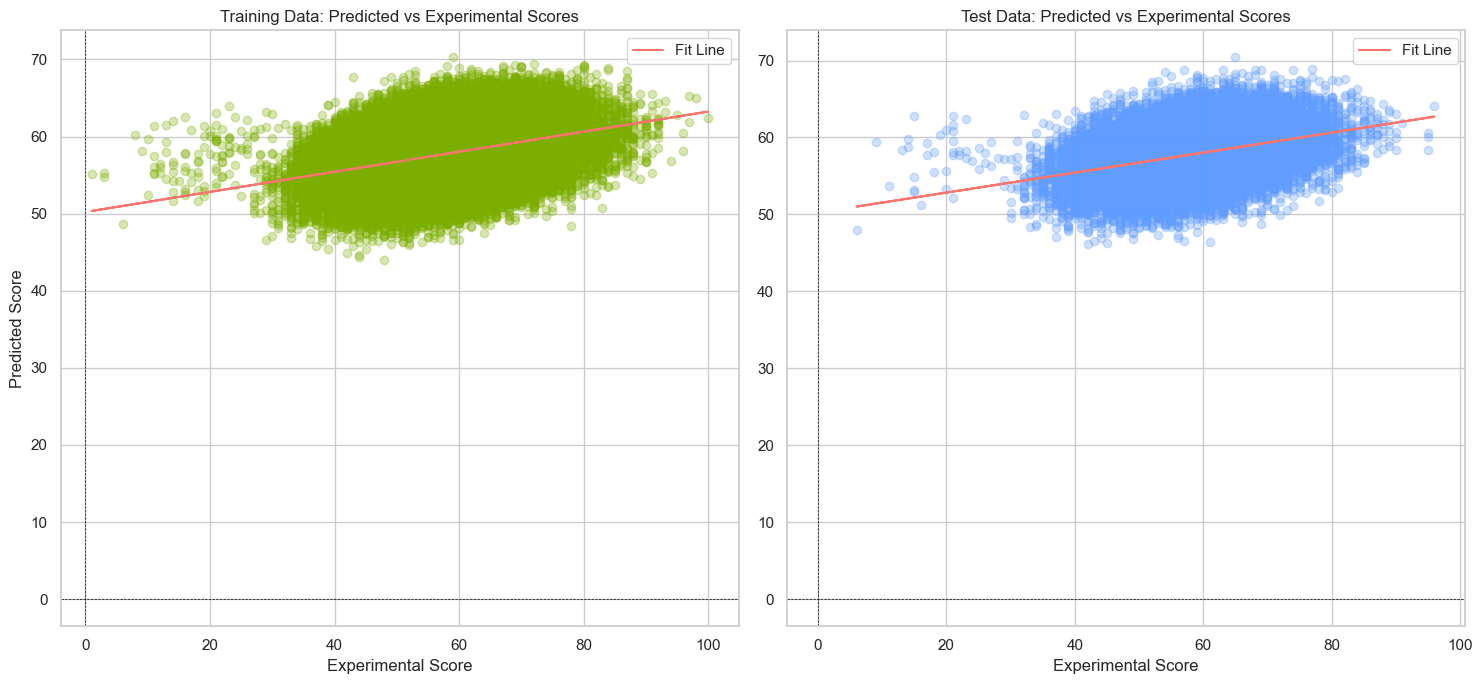

In [90]:
import matplotlib.pyplot as plt
import numpy as np

# Visualizations:
plt.figure(figsize=(15, 7))

# 1 row, 2 columns, plot 1
plt.subplot(1, 2, 1)
plt.scatter(x=Y_train, y=Y_train_pred, c="#7CAE00", alpha=0.3)
z_train = np.polyfit(Y_train, Y_train_pred, 1)
p_train = np.poly1d(z_train)
plt.plot(Y_train, p_train(Y_train), "#F8766D", label="Fit Line")

plt.ylabel("Predicted Score")
plt.xlabel("Experimental Score")
plt.title("Training Data: Predicted vs Experimental Scores")
plt.axhline(
    0, color="black", linewidth=0.5, linestyle="--"
)  # Add a horizontal line at y=0
plt.axvline(
    0, color="black", linewidth=0.5, linestyle="--"
)  # Add a vertical line at x=0
plt.legend()

# 1 row, 2 columns, plot 2
plt.subplot(1, 2, 2)
plt.scatter(x=Y_test, y=Y_test_pred, c="#619CFF", alpha=0.3)
z_test = np.polyfit(Y_test, Y_test_pred, 1)
p_test = np.poly1d(z_test)
plt.plot(Y_test, p_test(Y_test), "#F8766D", label="Fit Line")

plt.xlabel("Experimental Score")
plt.title("Test Data: Predicted vs Experimental Scores")
plt.axhline(
    0, color="black", linewidth=0.5, linestyle="--"
)  # Add a horizontal line at y=0
plt.axvline(
    0, color="black", linewidth=0.5, linestyle="--"
)  # Add a vertical line at x=0
plt.legend()

# Save and show the plot
plt.tight_layout()
plt.savefig("emp_score_plot.png")
plt.show()

### Candidates Data Analysis


In [119]:
# Creating a score variable for the candidates:

candidates_df["age"] = candidates_df["age"].apply(lambda x: float(x))
candidates_df["problem_solving_skill"] = candidates_df["problem_solving_skill"].apply(
    lambda x: float(x)
)
candidates_df["english_skill"] = candidates_df["english_skill"].apply(
    lambda x: float(x)
)
candidates_df["technology_skill"] = candidates_df["technology_skill"].apply(
    lambda x: float(x)
)

cal_age = 0.09 * candidates_df["age"]
cal_solve = -0.3065 * candidates_df["problem_solving_skill"]
cal_eng = 0.1865 * candidates_df["english_skill"]
cal_tech = -0.0199 * candidates_df["technology_skill"]
cal_income = 0.0001523 * candidates_df["most_recent_income"]

# Compute, assign, and print the score:
cal_score = 48.61 + cal_age + cal_solve + cal_tech + cal_eng + cal_income
candidates_df = candidates_df.assign(score=cal_score)

In [120]:
candidates_df.head()

,wombus_id,birth_continent,gender,age,college_degree,problem_solving_skill,technology_skill,english_skill,most_recent_income,total_jobs,shirt_color_preference,customer_exp_preference,work_env_preference,personal_growth_preference,honest_communication_preference,community_service_preference,remote_work_preference,industry_preference,score
0,1105,North America,Female,44.843891,0.0,8.400397,23.348271,9.105426,77367.0,5.000000,Purple,Strongly Disagree,Strongly Agree,Agree,Neutral,Strongly Agree,Hybrid,Higher Education,63.087754
1,1106,North America,Female,52.000000,1.0,7.787927,24.799825,9.095713,78979.0,4.000000,Blue,Neutral,Strongly Disagree,Disagree,Strongly Agree,Strongly Agree,Hybrid,Finance,64.134336
2,1107,North America,Male,32.000000,0.0,23.005739,25.484927,8.967305,38932.0,7.758287,Blue,Strongly Disagree,Disagree,Agree,Agree,Neutral,On-Site,Finance,51.533337
3,1108,Africa,Male,49.000000,0.0,15.565866,25.027173,5.914387,58511.0,7.758287,Purple,Disagree,Strongly Agree,Agree,Neutral,Strongly Agree,Hybrid,Tech,57.765280
4,1109,North America,Male,47.000000,0.0,12.784366,30.619283,8.751296,65831.0,7.758287,Purple,Strongly Disagree,Disagree,Neutral,Strongly Agree,Strongly Agree,On-Site,Renewable Energy,59.970446


### Exporting Datasets


In [121]:
candidates_df.to_csv("candidates_df.csv", index=False)
employees_df.to_csv("employees_df.csv", index=False)

In [122]:
sorted_rec = candidates_df.sort_values(["score"], ascending=[False])
print(sorted_rec)

# Highlighting the top 100 candidates and exporting them to a new dataframe:
top100 = sorted_rec.head(100)

# Top 10000 employees:
sorted_emp = employees_df.sort_values(["score"], ascending=[False])
emp100 = sorted_emp.head(100)

     wombus_id birth_continent  gender        age college_degree  \
78        1183   North America  Female  60.000000            0.0   
72        1177   North America  Female  52.000000            0.0   
105       1210   North America    Male  64.000000            1.0   
287       1392            Asia  Female  51.000000            0.0   
310       1415   North America  Female  36.000000            0.0   
..         ...             ...     ...        ...            ...   
342       1447          Africa    Male  44.000000            0.0   
22        1127            Asia  Female  27.000000            0.0   
35        1140   North America  Female  44.843891            0.0   
21        1126            Asia  Female  32.000000            1.0   
226       1331   North America    Male  36.000000            0.0   

     problem_solving_skill  technology_skill  english_skill  \
78                4.432909         23.911012       9.366827   
72                5.113707         19.150908       7.7582

Text(0.5, 1.0, 'Top 100 Candidates')

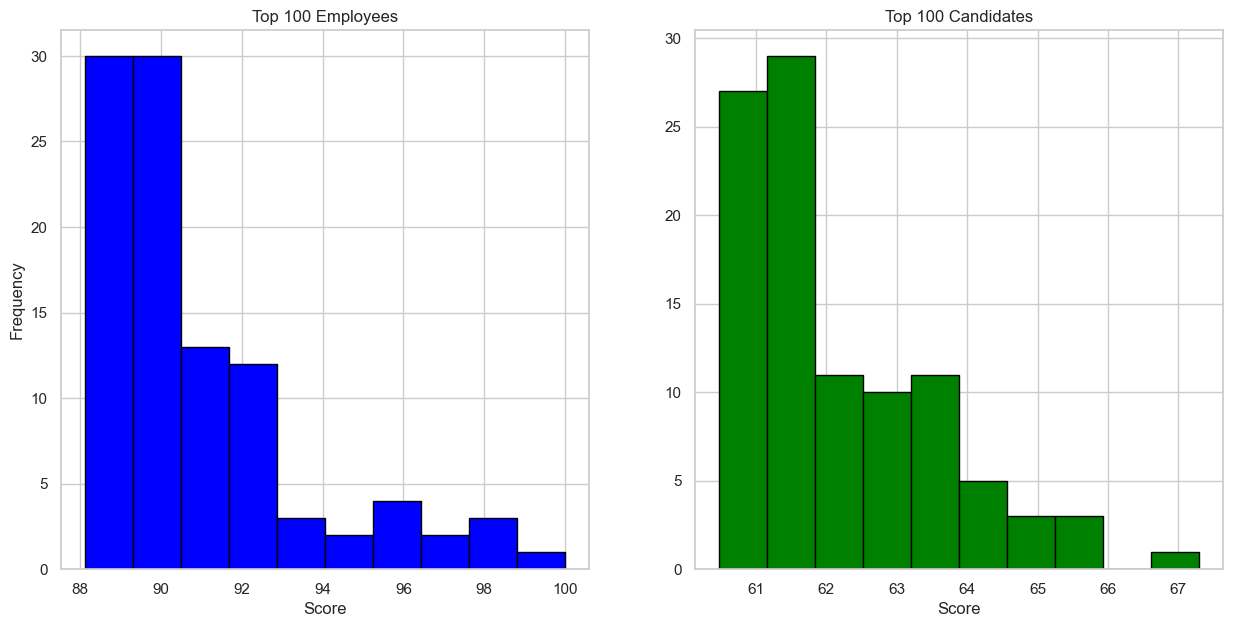

In [123]:
# Visualize the top 100 scores:
plt.figure(figsize=(15, 7))

# 1 row, 2 column, plot 1
plt.subplot(1, 2, 1)
plt.hist(emp100["score"], bins=10, color="blue", edgecolor="black")
plt.ylabel("Frequency")
plt.xlabel("Score")
plt.title("Top 100 Employees")

# 1 row, 2 column, plot 2
plt.subplot(1, 2, 2)
plt.hist(top100["score"], bins=10, color="green", edgecolor="black")
plt.xlabel("Score")
plt.title("Top 100 Candidates")

## XGBoost Model

In [67]:
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

## For metrics and helpful functions

from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import RepeatedKFold


In [ ]:
## Create XGBoost models for each test scores

xgb_score = XGBRegressor()

## Hyperparameter tuning with GridSearch

params = {'max_depth': [4,5,6,7,8], 
          'min_child_weight': [1,2,3,4,5],
          'learning_rate': [0.1, 0.2, 0.3],
          'n_estimators': [75, 100, 125]
          }

scores = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False)

grid_score = GridSearchCV(xgb_score, param_grid=params, cv=5, scoring=scores)

grid_score.fit(X_train, Y_train)

## Obtain the best hyperparameters

math_best_params = grid_score.best_params_


KeyboardInterrupt: 

In [ ]:
math_preds = cross_val_predict(grid_score.best_estimator_, X_train, Y_train, cv=5)
## Print RMSE values

rmse_math = np.sqrt(mean_squared_error(Y_train, math_preds))

print('RMSE Value for Scores:', rmse_math)


In [ ]:
## Create a scatterplot to visualize actual versus predicted scores

test_scores = {'Math':(Y_train, math_preds)}

plt.figure(figsize=(18,6))

for i, (subj_score_name,(actual_score, predicted_score)) in enumerate(test_scores.items()):
    plt.subplot(1,3, i+1)
    plt.scatter(actual_score, predicted_score, s=8, alpha=0.5)
    plt.title(f'{subj_score_name} Scores')
    plt.xlabel("Actual Scores")
    plt.ylabel("Predicted Scores")
    lr = LinearRegression()
    lr.fit(actual_score.values.reshape(-1,1), predicted_score)
    plt.plot(actual_score, lr.predict(actual_score.values.reshape(-1,1)), color='red', linewidth=2)
    
plt.tight_layout()
plt.show()

## Improving Model Performance by Other Methods/Models

In [50]:
df = pd.read_csv('Wombi-Data-Analysis-NA-Removed.csv')

In [51]:
df.head()

,wombus_id,birth_continent,gender,age,college_degree,problem_solving_skill,technology_skill,english_skill,most_recent_income,total_jobs,shirt_color_preference,customer_exp_preference,work_env_preference,personal_growth_preference,honest_communication_preference,community_service_preference,remote_work_preference,industry_preference,score
0,1560,North America,Male,47.0,0.0,10.598648,26.529753,9.386864,71583.0,3.0,Blue,Agree,Strongly Agree,Agree,Strongly Disagree,Strongly Agree,Hybrid,Higher Education,59.96
1,1561,Africa,Male,67.0,0.0,15.010481,25.382305,6.452992,59972.0,4.0,Purple,Disagree,Disagree,Neutral,Strongly Disagree,Strongly Agree,Hybrid,Finance,52.37
2,1562,North America,Male,39.0,0.0,13.553051,24.696864,9.142987,63808.0,4.0,Purple,Strongly Disagree,Strongly Agree,Strongly Disagree,Neutral,Neutral,Hybrid,Finance,42.72
3,1567,North America,Female,36.0,0.0,11.885339,30.827703,7.348390,68196.0,3.0,Purple,Neutral,Neutral,Agree,Strongly Agree,Agree,Remote,Tech,70.00
4,1568,North America,Male,36.0,0.0,20.136346,29.285150,8.682890,46483.0,3.0,Blue,Neutral,Strongly Agree,Agree,Agree,Strongly Agree,On-Site,Finance,60.88


In [52]:
df['gender'] = df['gender'].str.capitalize()  # Capitalize the first letter
df['gender'] = df['gender'].replace({'Female': 'Female', 'Male': 'Male'})
df['gender'] = np.where(df['gender']=='Male',1,0)

In [53]:
df['college_degree'] = df['college_degree'].astype(float)  # Convert to float (if not already)
df['college_degree'] = df['college_degree'].apply(lambda x: 1 if x != 0 else 0)

In [54]:
# Assuming you have a DataFrame called employees_df
unique_total_jobs = df['total_jobs'].unique()
print(f"Unique values in total_jobs: {unique_total_jobs}")


Unique values in total_jobs: [ 3.  4.  2.  5.  6. 10.  7.  1.  8.  0.  9.]


In [56]:
df['total_jobs'] = df['total_jobs'].replace({'0.0': 0.0})

# Convert to integers (and handle NaN values)
df['total_jobs'] = df['total_jobs'].fillna(0.0).astype(int)

In [57]:
df.total_jobs.unique()

array([ 3,  4,  2,  5,  6, 10,  7,  1,  8,  0,  9])

In [58]:
df

,wombus_id,birth_continent,gender,age,college_degree,problem_solving_skill,technology_skill,english_skill,most_recent_income,total_jobs,shirt_color_preference,customer_exp_preference,work_env_preference,personal_growth_preference,honest_communication_preference,community_service_preference,remote_work_preference,industry_preference,score
0,1560,North America,1,47.0,0,10.598648,26.529753,9.386864,71583.0,3,Blue,Agree,Strongly Agree,Agree,Strongly Disagree,Strongly Agree,Hybrid,Higher Education,59.96
1,1561,Africa,1,67.0,0,15.010481,25.382305,6.452992,59972.0,4,Purple,Disagree,Disagree,Neutral,Strongly Disagree,Strongly Agree,Hybrid,Finance,52.37
2,1562,North America,1,39.0,0,13.553051,24.696864,9.142987,63808.0,4,Purple,Strongly Disagree,Strongly Agree,Strongly Disagree,Neutral,Neutral,Hybrid,Finance,42.72
3,1567,North America,0,36.0,0,11.885339,30.827703,7.348390,68196.0,3,Purple,Neutral,Neutral,Agree,Strongly Agree,Agree,Remote,Tech,70.00
4,1568,North America,1,36.0,0,20.136346,29.285150,8.682890,46483.0,3,Blue,Neutral,Strongly Agree,Agree,Agree,Strongly Agree,On-Site,Finance,60.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65611,235480,Africa,1,33.0,0,21.480780,25.105973,6.054777,42945.0,4,Blue,Strongly Disagree,Disagree,Agree,Neutral,Disagree,Remote,Finance,36.70
65612,235481,Asia,1,34.0,0,16.830562,23.898258,6.437525,55183.0,5,Purple,Strongly Disagree,Neutral,Agree,Strongly Disagree,Strongly Agree,On-Site,Higher Education,49.28
65613,235486,North America,0,59.0,0,17.754821,27.755353,7.587821,52750.0,4,Purple,Neutral,Disagree,Strongly Disagree,Neutral,Strongly Agree,Remote,Higher Education,44.12
65614,235488,Europe,0,41.0,0,11.799902,27.049392,6.406870,68421.0,3,Blue,Strongly Agree,Disagree,Agree,Neutral,Disagree,Hybrid,Renewable Energy,61.65


In [59]:
df.fillna(0, inplace=True)
df = df.astype({'age': 'int64'})
df = df.astype({'problem_solving_skill': 'int64'})
df = df.astype({'technology_skill': 'int64'})
df = df.astype({'english_skill': 'int64'})
df = df.astype({'most_recent_income': 'int64'})
df = df.astype({'score': 'int64'})

In [60]:
df.head(2)

,wombus_id,birth_continent,gender,age,college_degree,problem_solving_skill,technology_skill,english_skill,most_recent_income,total_jobs,shirt_color_preference,customer_exp_preference,work_env_preference,personal_growth_preference,honest_communication_preference,community_service_preference,remote_work_preference,industry_preference,score
0,1560,North America,1,47,0,10,26,9,71583,3,Blue,Agree,Strongly Agree,Agree,Strongly Disagree,Strongly Agree,Hybrid,Higher Education,59
1,1561,Africa,1,67,0,15,25,6,59972,4,Purple,Disagree,Disagree,Neutral,Strongly Disagree,Strongly Agree,Hybrid,Finance,52


In [62]:
len(df.columns)

19

In [64]:
df = df.drop(
    [
        "wombus_id",  # Unique identifier
        "gender",
        "total_jobs",
        "shirt_color_preference",  # Categorical column
        "birth_continent",
        "customer_exp_preference", 
        "work_env_preference", 
        "personal_growth_preference", 
        "honest_communication_preference", 
        "community_service_preference", 
        "remote_work_preference", 
        "industry_preference",
        "college_degree",
        
    ],
    axis=1,)

In [65]:
df.head()

,age,problem_solving_skill,technology_skill,english_skill,most_recent_income,score
0,47,10,26,9,71583,59
1,67,15,25,6,59972,52
2,39,13,24,9,63808,42
3,36,11,30,7,68196,70
4,36,20,29,8,46483,60


In [68]:
from sklearn.preprocessing import StandardScaler
# Features and target variable
X = df.drop('score', axis=1)
y = df['score']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [69]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [70]:
# Display the shapes of the training and testing sets:
print("Training data shape (X_train):", X_train.shape)
print("Testing data shape (X_test):", X_test.shape)
print("Training labels shape (Y_train):", y_train.shape)
print("Testing labels shape (Y_test):", y_test.shape)

Training data shape (X_train): (52492, 5)
Testing data shape (X_test): (13124, 5)
Training labels shape (Y_train): (52492,)
Testing labels shape (Y_test): (13124,)


In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    # 'Support Vector Regressor': SVR()
}

results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[model_name] = {
        'MSE': mse,
        'R2 Score': r2
    }


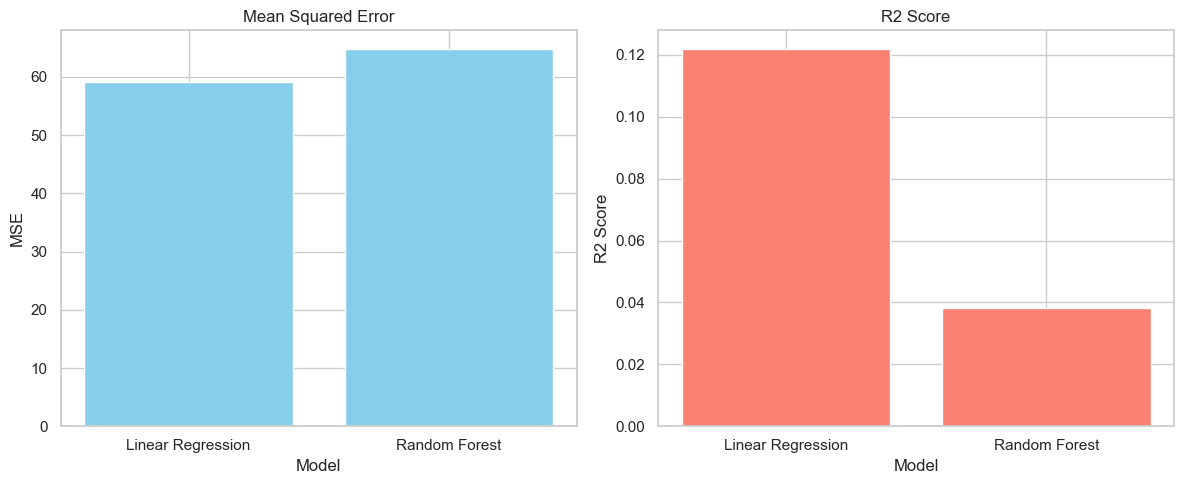

In [74]:
# Plotting results
model_names = list(results.keys())
mse_values = [result['MSE'] for result in results.values()]
r2_values = [result['R2 Score'] for result in results.values()]

plt.figure(figsize=(12, 5))

# Plot MSE
plt.subplot(1, 2, 1)
plt.bar(model_names, mse_values, color='skyblue')
plt.title('Mean Squared Error')
plt.xlabel('Model')
plt.ylabel('MSE')

# Plot R2 Score
plt.subplot(1, 2, 2)
plt.bar(model_names, r2_values, color='salmon')
plt.title('R2 Score')
plt.xlabel('Model')
plt.ylabel('R2 Score')

plt.tight_layout()
plt.show()


In [75]:
import joblib
# Save the best model (you can choose the one with the best R2 score)
best_model_name = max(results, key=lambda x: results[x]['R2 Score'])
best_model = models[best_model_name]

# Save the model
joblib.dump(best_model, 'best_regression_model.pkl')
joblib.dump(scaler, 'scaler.pkl')  # Save the scaler as well


['scaler.pkl']

In [76]:
# Load the model and scaler
loaded_model = joblib.load('best_regression_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')


In [78]:
# Example of a new instance with only the required features
new_instance = np.array([[1, 40, 18, 28, 60000]])  # Adjusted to 5 features

# Scale the new instance
new_instance_scaled = loaded_scaler.transform(new_instance)

# Predict score
predicted_score = loaded_model.predict(new_instance_scaled)
print(f'Predicted Score: {predicted_score[0]}')

Predicted Score: 59.66120455372632


c:\Users\Nawaz\anaconda3\envs\media\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### Multi Model Comparison

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regression': SVR(),
    'Decision Tree': DecisionTreeRegressor(),
    'K-Nearest Neighbors': KNeighborsRegressor()
}




In [80]:
# Train models and collect performance metrics
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}



In [81]:
# Display results
results_df = pd.DataFrame(results).T
results_df

,MSE,R2
Linear Regression,59.106483,0.121868
Random Forest,64.805381,0.037201
Support Vector Regression,58.882816,0.125191
Decision Tree,124.415308,-0.848410
K-Nearest Neighbors,69.347671,-0.030283


C:\Users\Nawaz\AppData\Local\Temp\ipykernel_21444\1602775182.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_df.index, y="R2", data=metrics_df, palette="viridis")


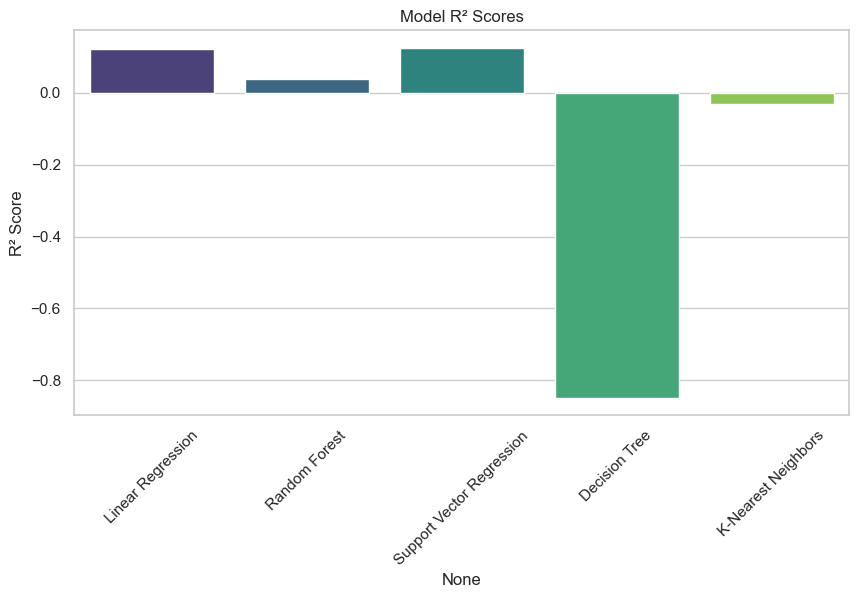

                                  MSE        R2
Linear Regression           59.106483  0.121868
Random Forest               64.805381  0.037201
Support Vector Regression   58.882816  0.125191
Decision Tree              124.415308 -0.848410
K-Nearest Neighbors         69.347671 -0.030283


In [82]:
# Step 4: Visualize Model Performance
metrics_df = pd.DataFrame(results).T

plt.figure(figsize=(10, 5))
sns.barplot(x=metrics_df.index, y="R2", data=metrics_df, palette="viridis")
plt.title("Model R² Scores")
plt.ylabel("R² Score")
plt.xticks(rotation=45)
plt.show()

# Print metrics
print(metrics_df)

# Deployment Strategy for Wombus World Predictive Model

## Overview

Deploying the predictive model for estimating the scores of Wombi candidates requires a robust architecture capable of handling high traffic, given the expected volume of over 1 million applications per day. The deployment plan encompasses Continuous Integration and Continuous Deployment (CI/CD) pipelines, model testing, monitoring, data storage, load balancing, and performance optimization.

## 1. CI/CD Pipeline

- Automate the deployment process.
- Ensure seamless integration of new code changes.

- **Version Control:** Use Git for source code management, ensuring that all changes are tracked and documented.
- **CI/CD Tools:** Leverage tools like Jenkins or GitHub Actions to automate the testing and deployment processes.
- **Automated Testing:** Implement unit tests and integration tests to validate the model's functionality and performance metrics before deployment.

## 2. Model Testing

- Ensure the model performs as expected in the production environment.

- **Pre-Deployment Testing:** Conduct thorough testing using validation datasets to check for overfitting and to ensure generalizability.
- **A/B Testing:** Roll out the new model alongside the existing one for a subset of users, comparing performance metrics in real-time.

## 3. Monitoring

- Continuously track the model's performance post-deployment.

- **Performance Metrics:** Monitor key metrics such as Mean Squared Error (MSE) and R² to detect any degradation in performance.
- **Logging:** Use logging frameworks to capture detailed logs for tracking predictions and errors. Tools like ELK Stack (Elasticsearch, Logstash, Kibana) can be implemented for log analysis.

## 4. Data Storage

- Efficiently manage the data for both model training and inference.

- **Data Storage Solutions:** Use cloud storage solutions such as AWS S3 or Azure Blob Storage for storing historical candidate data and model artifacts.
- **Database Management:** Utilize databases like PostgreSQL or MongoDB for structured storage of candidate profiles and scores, ensuring fast retrieval and scalability.

## 5. Load Balancing

- Ensure that the application can handle high traffic without performance degradation.

- **Load Balancer:** Deploy a load balancer (e.g., AWS Elastic Load Balancing) to distribute incoming requests across multiple instances of the application, ensuring no single instance becomes a bottleneck.
- **Auto-Scaling:** Implement auto-scaling policies to dynamically adjust the number of instances based on traffic demand, optimizing resource usage.

## 6. Performance Optimization

- Minimize latency and maximize throughput.

- **Model Optimization:** Consider techniques such as model pruning and quantization to reduce the model size and inference time.
- **Caching:** Use caching strategies for frequently accessed data to speed up response times, utilizing Redis or Memcached.

## Conclusion

By following this deployment strategy, the Wombus World predictive model can be effectively integrated into the existing infrastructure, ensuring reliability and scalability to meet the anticipated demand. Continuous monitoring and optimization will be crucial in maintaining model performance and providing a seamless experience for users.
